# [실습5] 딥러닝 학습을 위한 MLP 모델 구현 및  적용

---

## 실습 목표
---
- 이론으로 배운 퍼셉트론을 딥러닝 프레임워크를 통해 직접 구현하고 동작원리를 이해합니다.
- 완전연결신경망을 예제 데이터를 통해 구현해봅니다.

## 실습 목차

1. **퍼셉트론 구현** : Python을 이용해 퍼셉트론을 구현합니다.
2. **AND, NAND, OR, XOR 문제 해결** : 단층, 다층 퍼셉트론을 활용하여 문제를 해결합니다.
3. **MLP를 활용한 잉크젯 생성 데이터 예측** : 데이터의 전처리와 MLP 회귀 모델 구축 및 데이터 학습과 결과를 확인합니다.
4. **연습문제** : 연습문제를 통해 실제 모델을 구현해보고, 결과를 확인합니다.

---

## 1. 퍼셉트론 구현

### 1.1 라이브러리 불러오기



  퍼셉트론 구현에 필요한 주요 라이브러리를 불러옵니다.
 - **numpy**: 수치형 데이터를 배열 구조로 처리하기 위한 라이브러리
 - **matplotlib.pyplot**: 데이터시각화를 위한 라이브러리

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.2 퍼셉트론 구현하기

---

함수 기능인 def를 이용해 퍼셉트론을 구현해보겠습니다.
- X1, x2는 각각 실제값, w1, w2는 각각의 가중치를 의미합니다.
- 각각의 가중합((w1 * x1), (w2 * x2)의 합)이 임계값보다 크다면 1을 반환하고, 작다면 0을 반환하도록 합니다.
- theta는 임계값을 의미합니다.

In [2]:
def perceptron(x1, x2, w1, w2, theta):
    if(w1 * x1) + (w2 * x2) > theta : 
        return 1
    else :
        return 0

## 2. AND, NAND, OR, XOR 문제 해결

---

앞서 구현한 퍼셉트론을 이용해 다양한 상황에서 문제를 해결할 수 있습니다. AND, NAND, OR 등 단일 퍼셉트론으로 해결할 수 있는 문제와, 다층 퍼셉트론으로 풀 수 있는 XOR문제에 대해 알아보겠습니다.

### 2.1 AND, NAND, OR 문제

---

In [3]:
def AND(x1, x2):
    return perceptron(x1, x2, 0.5, 0.5, 0.7)

print('=======')
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


가중치와 임계값은 같은 경과가 나온다면 수정이 가능합니다. 아래에서 가중치와 임계값을 모두 1로 변경하고 진행해보도록 하겠습니다.

In [4]:
def AND(x1, x2):
    return perceptron(x1, x2, 1, 1, 1)

print('=======')
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


다음으로 AND의 반대인 NAND문제를 단일 퍼셉트론으로 풀어보도록 하겠습니다. 기존의 AND문제와 반대가 되어야 하기 때문에 가중치와 임계값을 전부 -값으로 바꿔보겠습니다.

In [5]:
def NAND(x1, x2):
    return perceptron(x1, x2, -0.5, -0.5, -0.7)

print('=======')
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


다음으로 OR문제입니다. 두 값중 하나라도 임계값보다 크다면 1을 반환합니다.

In [6]:
def OR(x1, x2):
    return perceptron(x1, x2, 0.5, 0.5, 0.2)

print('=======')
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


단일 퍼셉트론으로 XOR같은 비선형 문제는 풀 수 없을까요?
- 단층 퍼셉트론은 완전히 분리가 되어있는 데이터에서는 정확한 분류가 가능합니다. 하지만 이래 그래프와 같은 상황에서는 분류를 위해서는 두개의 선이나 곡선이 필요합니다. 따라서 단일 퍼셉트론으로는 풀 수 가 없습니다.

<img src= "https://wikidocs.net/images/page/24958/xorgraphandxorgate.PNG" width=600 height=400>

### 2.2 XOR 문제

---

앞서 살펴본 것과 같이 XOR은 두개의 값이 서로 다를 때 1을, 같을 때 0을 나타내는 문제입니다. 두 값이 하나의 선으로는 분류가 제대로 되지 않습니다.
- 단일 퍼셉트론으로는 분류에 한계가 존재합니다. 따라서 퍼셉트론을 여러 개 이어 붙여서 해결해야 합니다.

In [7]:
def XOR(x1, x2):
    return perceptron(
        perceptron(x1, x2, -0.5, -0.5, -0.7),
        perceptron(x1, x2, 0.5, 0.5, 0.2)
        , 0.5, 0.5, 0.7) # AND(NAND(x1, x2),OR(x1, x2))의 형태
print('=======')
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


## 3. MLP를 활용한 잉크젯 생성 데이터 예측




---

- MLP (Multi Layer Perceptron)를 자유롭게 구현할 수 있는 딥러닝 프레임워크를 사용하여 잉크젯 생성 데이터를 예측해 봅니다.
- Tensorflow라는 딥러닝 프레임워크를 이용하여, 가장 간단한 MLP부터 시작해 봅시다.

### 3.1 데이터 및 라이브러리 불러오기

---

먼저 필요한 라이브러리를 불러옵니다.
- **tensorflow의 kerasAPI** 를 활용해 실습을 진행하겠습니다.
- **텐서플로(TensorFlow)** : 구글(Google)에서 만든, 딥러닝 프로그램을 쉽게 구현할 수 있도록 다양한 기능을 제공해주는 라이브러리입니다.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

2025-02-11 06:35:43.007498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-11 06:35:43.157580: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 06:35:43.202726: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 06:35:45.515104: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

이전 시간에 전처리했던 잉크젯 데이터를 불러옵니다.

In [9]:
df = pd.read_csv('InkjetDB_preprocessing.csv')

### 3.2 데이터 확인 및 시각화

---

전처리된 잉크젯 데이터를 확인하고 시각화를 진행해 봅니다.

In [10]:
df.head()

,Unnamed: 0,Viscosity,Velocity,PrintingSpeed,PatternSize
0,1,8,5,150,19
1,5,5,7,50,224
2,17,8,5,125,29
3,19,8,7,25,88
4,24,5,6,175,61


'Unnamed: 0' 컬럼을 제거해 줍니다.

In [11]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Viscosity,Velocity,PrintingSpeed,PatternSize
0,8,5,150,19
1,5,7,50,224
2,8,5,125,29
3,8,7,25,88
4,5,6,175,61


우리가 예측하여야 할 값은 PatternSize 값입니다.

input(x) : Viscosity, Velocity, PrintingSpeed

output(y) : Patternsize

로 정리할 수 있습니다.

먼저, 3차원 산점도로 시각화를 진행해 봅니다.

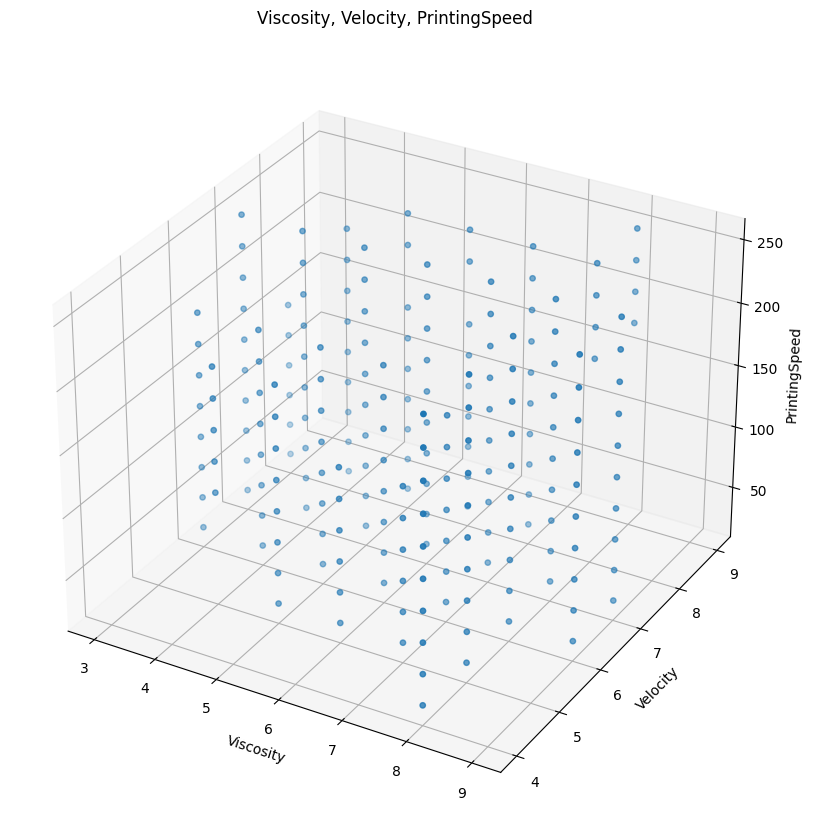

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Viscosity'], df['Velocity'], df['PrintingSpeed'], marker='o', s=15)
plt.title('Viscosity, Velocity, PrintingSpeed', pad=20)
ax.set_xlabel('Viscosity')
ax.set_ylabel('Velocity')
ax.set_zlabel('PrintingSpeed')
plt.show()

### 3.3. 데이터 전처리

X(input)과 Y(label)을 구분해 봅시다.

In [13]:
X = df.loc[:, 'Viscosity': 'PrintingSpeed']
Y = df['PatternSize']

3일차에 배운 방법대로 X 데이터를 정규화해 봅시다.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 원래 데이터들의 평균과 분산 확인 
print('feature 들의 평균 값')
print(X.mean())
print('\nfeature 들의 분산 값')
print(X.var())

# 반드시 train-test split 후 scaler 적용
X_train, X_val, y_train,y_val = train_test_split(X,Y,test_size = 0.2, random_state = 1 )

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled=scaler.transform(X_val)

print("\n=========== 표준화 ==============\n")

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_df_scaled = pd.DataFrame(data=X_train_scaled, columns=X.columns)
print('feature 들의 평균 값')
print(X_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(X_df_scaled.var())

feature 들의 평균 값
Viscosity          6.080000
Velocity           6.537778
PrintingSpeed    129.777778
dtype: float64

feature 들의 분산 값
Viscosity           3.493571
Velocity            1.356825
PrintingSpeed    4728.745040
dtype: float64

=========== 표준화 ==============

feature 들의 평균 값
Viscosity        1.282924e-16
Velocity        -1.727014e-16
PrintingSpeed   -4.194176e-17
dtype: float64

feature 들의 분산 값
Viscosity        1.005587
Velocity         1.005587
PrintingSpeed    1.005587
dtype: float64


텐서플로우를 사용하기 위하여 Training set과 Validation set으로 나누어 데이터셋을 생성하여 봅시다.

In [15]:
X_train=tf.convert_to_tensor(X_train_scaled)
X_val=tf.convert_to_tensor(X_val_scaled)
Y_train = tf.convert_to_tensor(y_train)
Y_val=tf.convert_to_tensor(y_val)

print('X_train_shape : ', X_train.shape)
print('X_val_shape : ', X_val.shape)
print('Y_train_shape : ', Y_train.shape)
print('Y_val_shape :', Y_val.shape)

X_train_shape :  (180, 3)
X_val_shape :  (45, 3)
Y_train_shape :  (180,)
Y_val_shape : (45,)


2025-02-11 06:37:50.321941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-02-11 06:37:50.321999: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-02-11 06:37:50.322046: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (038a1c898776): /proc/driver/nvidia/version does not exist
2025-02-11 06:37:50.323458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 3.4 간단한 모델 구현

먼저 간단한 MLP로 데이터를 분류해보도록 하겠습니다.

In [16]:
model1 = tf.keras.Sequential()
# model1 에 sequential model을 정의

model1.add(tf.keras.Input(shape = 3)) # 3개 input을 받는 층 
model1.add(Dense(20)) # 20개짜리 layer 
model1.add(Dense(1)) # 1개짜리 layer (최종 layer: output과 차원 일치)

learning_rate = 5e-4
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 30

model1.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                80        
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


/home/elicer/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Input : 3->20->1 : Output 인 모델을 정의했습니다.

파라미터 수는 (3+1)x20 + (20+1)x1 = 101 개 입니다.

input이 3개이므로 각각을 $x_1,x_2,x_3$ 라고 하겠습니다. 

두 번째 layer 20개 중 하나의 값을 $z$라고 하면,

$z=activation(w_1x_1+w_2x_2+w_3x_3+b)$ 형태가 될 텐데요.

$w$들 이외에 $b$(bias) 또한 학습 가능한 파라미터이기 때문에 파라미터의 수에 +1이 추가되는 것입니다.

절대적인 기준은 아니지만, 파라미터의 수는 모델의 복잡도를 결정하는 데에 중요한 지표입니다.\
데이터에 비해 파라미터가 너무 많으면 오버피팅의 가능성이 증가하고, 너무 적으면 언더피팅의 가능성이 증가합니다.


### 3.5 간단한 모델 학습 및 결과 시각화

---

In [17]:
hist1 = model1.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/30
6/6 [==============================] - 1s 54ms/step - loss: 28039.7148 - mse: 28039.7148 - mae: 111.5817 - val_loss: 14409.7363 - val_mse: 14409.7363 - val_mae: 90.1137
Epoch 2/30
6/6 [==============================] - 0s 8ms/step - loss: 28027.1602 - mse: 28027.1602 - mae: 111.5611 - val_loss: 14401.1504 - val_mse: 14401.1504 - val_mae: 90.0952
Epoch 3/30
6/6 [==============================] - 0s 8ms/step - loss: 28015.7109 - mse: 28015.7109 - mae: 111.5433 - val_loss: 14392.4541 - val_mse: 14392.4541 - val_mae: 90.0759
Epoch 4/30
6/6 [==============================] - 0s 7ms/step - loss: 28003.5000 - mse: 28003.5000 - mae: 111.5230 - val_loss: 14383.9775 - val_mse: 14383.9775 - val_mae: 90.0571
Epoch 5/30
6/6 [==============================] - 0s 7ms/step - loss: 27991.2559 - mse: 27991.2559 - mae: 111.5044 - val_loss: 14375.5098 - val_mse: 14375.5098 - val_mae: 90.0384
Epoch 6/30
6/6 [==============================] - 0s 8ms/step - loss: 27979.0176 - mse: 27979.0176 - mae

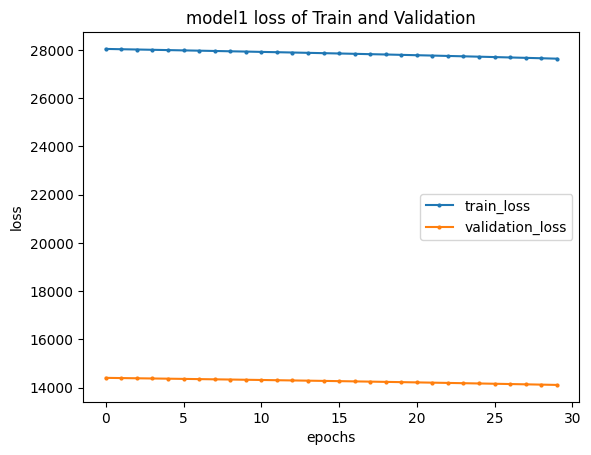

In [18]:
plt.title('model1 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist1.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist1.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()

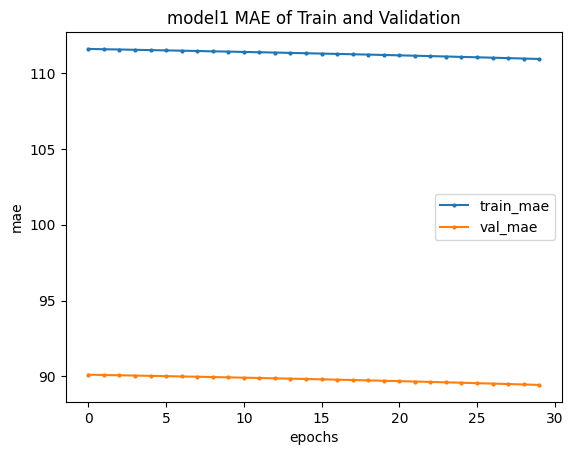

In [19]:
plt.title('model1 MAE of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.plot(hist1.history['mae'], marker = 'o', ms = 2, label='train_mae')
plt.plot(hist1.history['val_mae'], marker = 'o', ms = 2, label='val_mae')
plt.legend()

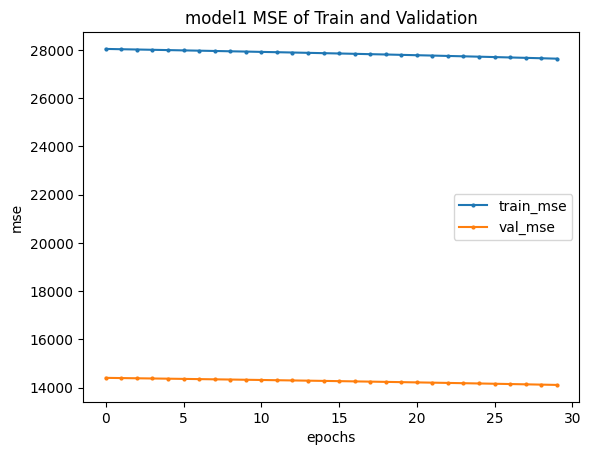

In [20]:
plt.title('model1 MSE of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.plot(hist1.history['mse'], marker = 'o', ms = 2, label='train_mse')
plt.plot(hist1.history['val_mse'], marker = 'o', ms = 2, label='val_mse')
plt.legend()

matplotlib을 활용해 시각화를 진행하면 그래프의 형태로 학습의 진행상황을 살펴볼 수 있습니다.

결정계수와 평균제곱근오차를 구해 봅니다.

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# batch_size는 한 번에 메모리에 포함할 양을 결정함
preds = model1.predict(X_val, batch_size=128)

rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

1/1 [==============================] - 0s 118ms/step
결정계수 : -1.2454816972833087
평균제곱근오차 :  118.81554550027711


실제 적합을 어느 정도로 하고 있는지 시각화 그래프를 그려 봅니다.

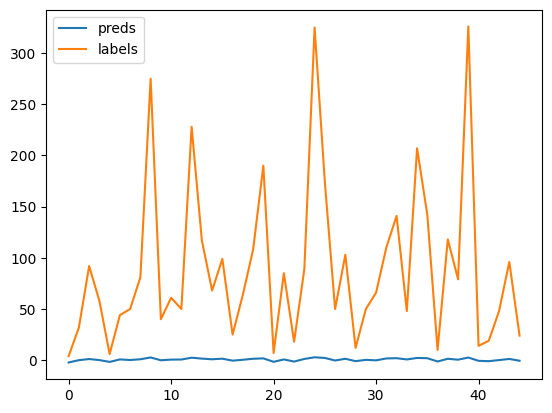

In [22]:
x_axis = [i for i in range(len(preds))]
plt.plot(x_axis,preds,label='preds')
plt.plot(x_axis,Y_val,label='labels')
plt.legend()

아직은 잘 적합하지 못하고 있습니다.

###  3.6 층수 늘려보기

---

그렇다면 층수를 더 늘리면 어떻게될까요? 좀더 많은 층을 추가해서 실습을 진행해보겠습니다.

In [23]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape = 3))
model2.add(Dense(20))
model2.add(Dense(20)) # 3,20,1 에서 3,20,20,1 로 바뀜
model2.add(Dense(1))

In [24]:
learning_rate = 5e-4
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 30

model2.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                80        
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


/home/elicer/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
hist2 = model2.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/30
6/6 [==============================] - 1s 42ms/step - loss: 28031.2832 - mse: 28031.2832 - mae: 111.5760 - val_loss: 14364.7793 - val_mse: 14364.7793 - val_mae: 89.9754
Epoch 2/30
6/6 [==============================] - 0s 9ms/step - loss: 27998.3613 - mse: 27998.3613 - mae: 111.5370 - val_loss: 14344.6943 - val_mse: 14344.6943 - val_mae: 89.9501
Epoch 3/30
6/6 [==============================] - 0s 8ms/step - loss: 27965.9551 - mse: 27965.9551 - mae: 111.4967 - val_loss: 14324.4639 - val_mse: 14324.4639 - val_mae: 89.9254
Epoch 4/30
6/6 [==============================] - 0s 8ms/step - loss: 27934.7031 - mse: 27934.7031 - mae: 111.4579 - val_loss: 14304.0088 - val_mse: 14304.0088 - val_mae: 89.9002
Epoch 5/30
6/6 [==============================] - 0s 9ms/step - loss: 27899.4668 - mse: 27899.4668 - mae: 111.4160 - val_loss: 14284.2959 - val_mse: 14284.2959 - val_mae: 89.8756
Epoch 6/30
6/6 [==============================] - 0s 8ms/step - loss: 27865.4492 - mse: 27865.4492 - mae

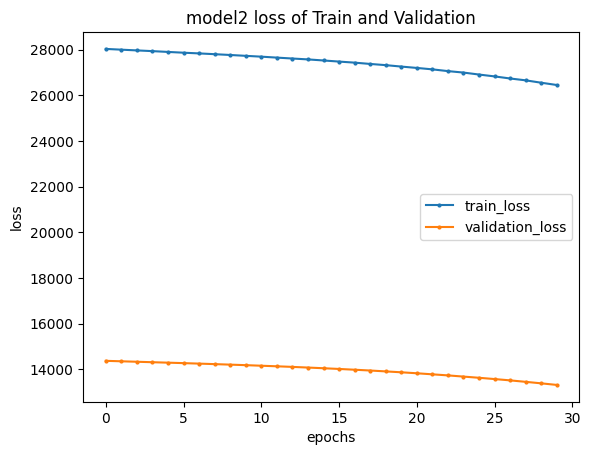

In [26]:
plt.title('model2 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist2.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist2.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()

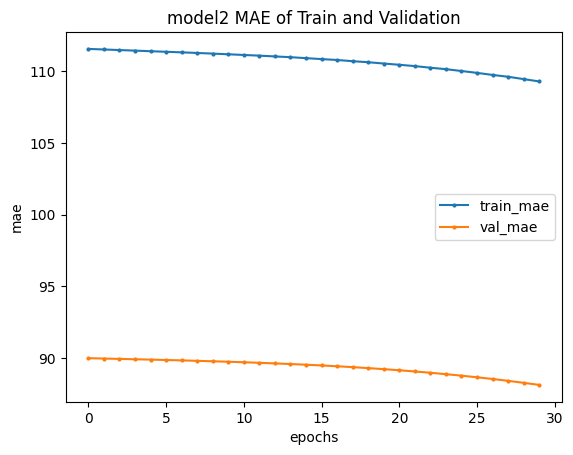

In [27]:
plt.title('model2 MAE of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.plot(hist2.history['mae'], marker = 'o', ms = 2, label='train_mae')
plt.plot(hist2.history['val_mae'], marker = 'o', ms = 2, label='val_mae')
plt.legend()

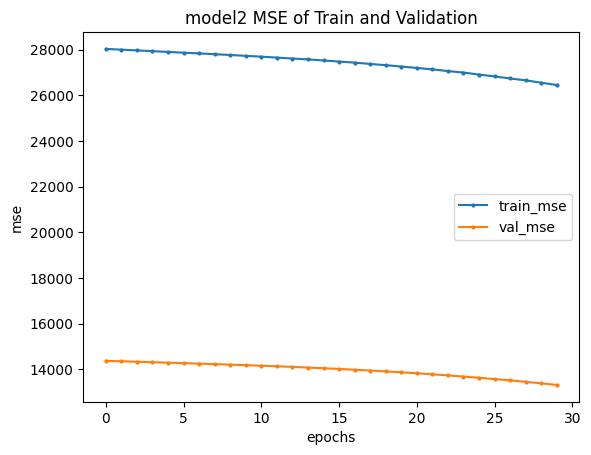

In [28]:
plt.title('model2 MSE of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.plot(hist2.history['mse'], marker = 'o', ms = 2, label='train_mse')
plt.plot(hist2.history['val_mse'], marker = 'o', ms = 2, label='val_mse')
plt.legend()

In [29]:
preds = model2.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

1/1 [==============================] - 0s 68ms/step
결정계수 : -1.1170006611959917
평균제곱근오차 :  115.36631037790376


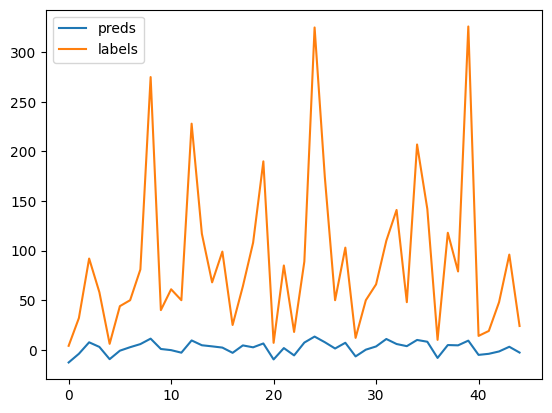

In [30]:
x_axis = [i for i in range(len(preds))]
plt.plot(x_axis,preds,label='preds')
plt.plot(x_axis,Y_val,label='labels')
plt.legend()

결정계수와 시각화 결과가 이전보다 조금씩 좋아짐을 확인할 수 있습니다.

### 3.7 에포크 수정해보기

---

모델이 한번 학습을 진행한 프로세스를 1에포크라고 합니다. 기존에는 에포크를 30회 수행했습니다. 이번에는 에포크를 60회로 학습을 진행해보겠습니다.

In [31]:
# model2와 같은 model3 생성
model3 = tf.keras.Sequential()
model3.add(tf.keras.Input(shape = 3))
model3.add(Dense(20))
model3.add(Dense(20))
model3.add(Dense(1))

In [32]:
learning_rate = 5e-4
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 60 # 30에서 60으로 증가

model3.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                80        
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


/home/elicer/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
hist3 = model3.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/60
6/6 [==============================] - 1s 43ms/step - loss: 27964.9062 - mse: 27964.9062 - mae: 111.5747 - val_loss: 14340.2002 - val_mse: 14340.2002 - val_mae: 90.0353
Epoch 2/60
6/6 [==============================] - 0s 8ms/step - loss: 27944.8828 - mse: 27944.8828 - mae: 111.5511 - val_loss: 14326.0225 - val_mse: 14326.0225 - val_mae: 90.0120
Epoch 3/60
6/6 [==============================] - 0s 8ms/step - loss: 27923.0781 - mse: 27923.0781 - mae: 111.5279 - val_loss: 14311.6055 - val_mse: 14311.6055 - val_mae: 89.9873
Epoch 4/60
6/6 [==============================] - 0s 8ms/step - loss: 27902.7383 - mse: 27902.7383 - mae: 111.4980 - val_loss: 14297.0635 - val_mse: 14297.0635 - val_mae: 89.9633
Epoch 5/60
6/6 [==============================] - 0s 8ms/step - loss: 27880.6445 - mse: 27880.6426 - mae: 111.4704 - val_loss: 14282.7236 - val_mse: 14282.7236 - val_mae: 89.9401
Epoch 6/60
6/6 [==============================] - 0s 8ms/step - loss: 27857.9492 - mse: 27857.9492 - mae

6/6 [==============================] - 0s 7ms/step - loss: 24081.9082 - mse: 24081.9082 - mae: 105.1470 - val_loss: 11623.8535 - val_mse: 11623.8535 - val_mae: 83.8339
Epoch 47/60
6/6 [==============================] - 0s 6ms/step - loss: 23865.5898 - mse: 23865.5898 - mae: 104.7297 - val_loss: 11470.2344 - val_mse: 11470.2344 - val_mae: 83.4192
Epoch 48/60
6/6 [==============================] - 0s 7ms/step - loss: 23635.9941 - mse: 23635.9941 - mae: 104.2899 - val_loss: 11313.0938 - val_mse: 11313.0938 - val_mae: 82.9906
Epoch 49/60
6/6 [==============================] - 0s 7ms/step - loss: 23388.3203 - mse: 23388.3203 - mae: 103.8366 - val_loss: 11155.8135 - val_mse: 11155.8135 - val_mae: 82.5541
Epoch 50/60
6/6 [==============================] - 0s 7ms/step - loss: 23145.7754 - mse: 23145.7754 - mae: 103.3586 - val_loss: 10993.3809 - val_mse: 10993.3809 - val_mae: 82.0981
Epoch 51/60
6/6 [==============================] - 0s 7ms/step - loss: 22899.7363 - mse: 22899.7363 - mae: 102.8

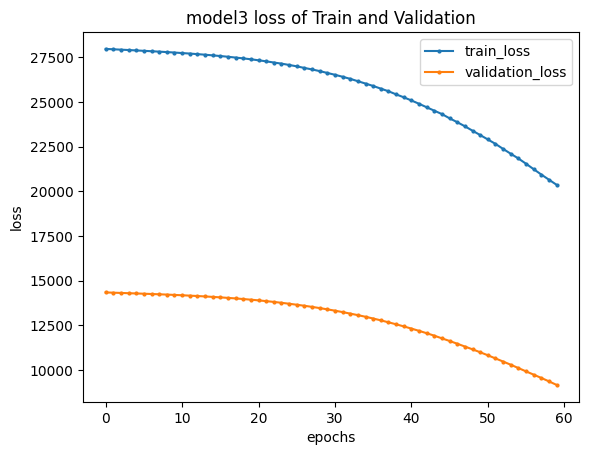

In [34]:
plt.title('model3 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist3.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist3.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()

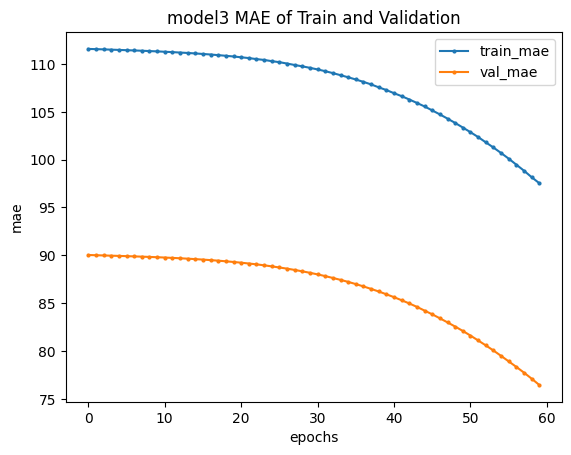

In [35]:
plt.title('model3 MAE of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.plot(hist3.history['mae'], marker = 'o', ms = 2, label='train_mae')
plt.plot(hist3.history['val_mae'], marker = 'o', ms = 2, label='val_mae')
plt.legend()

In [36]:
preds = model3.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

1/1 [==============================] - 0s 43ms/step
결정계수 : -0.45783419631975164
평균제곱근오차 :  95.73540373204308


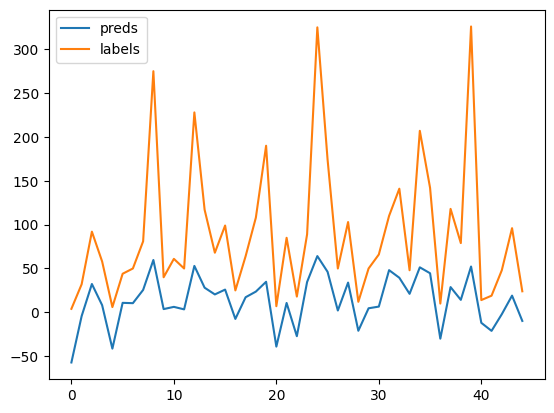

In [37]:
x_axis = [i for i in range(len(preds))]
plt.plot(x_axis,preds,label='preds')
plt.plot(x_axis,Y_val,label='labels')
plt.legend()

학습을 많이 시키니 점점 비슷해져 갑니다!

이번에는 epoch을 대폭 늘려서 200으로 설정해보도록 하겠습니다.

In [38]:
# model2와 같은 model3 생성
model3_long = tf.keras.Sequential()
model3_long.add(tf.keras.Input(shape = 3))
model3_long.add(Dense(20))
model3_long.add(Dense(20))
model3_long.add(Dense(1))

learning_rate = 5e-4
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 200 # 30에서 증가

model3_long.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model3_long.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                80        
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


/home/elicer/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [39]:
hist3_long = model3_long.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/200
6/6 [==============================] - 1s 42ms/step - loss: 27902.6309 - mse: 27902.6309 - mae: 111.5739 - val_loss: 14325.0254 - val_mse: 14325.0254 - val_mae: 90.1935
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 27869.7715 - mse: 27869.7715 - mae: 111.5383 - val_loss: 14303.8447 - val_mse: 14303.8447 - val_mae: 90.1715
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 27834.5195 - mse: 27834.5195 - mae: 111.4997 - val_loss: 14281.8975 - val_mse: 14281.8975 - val_mae: 90.1473
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 27797.7383 - mse: 27797.7383 - mae: 111.4650 - val_loss: 14260.4600 - val_mse: 14260.4600 - val_mae: 90.1255
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 27763.3887 - mse: 27763.3887 - mae: 111.4188 - val_loss: 14238.1816 - val_mse: 14238.1816 - val_mae: 90.1010
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 27727.3555 - mse: 27727.3555

6/6 [==============================] - 0s 8ms/step - loss: 23458.8555 - mse: 23458.8555 - mae: 104.7841 - val_loss: 11327.4434 - val_mse: 11327.4434 - val_mae: 84.0717
Epoch 47/200
6/6 [==============================] - 0s 8ms/step - loss: 23221.0859 - mse: 23221.0840 - mae: 104.3163 - val_loss: 11177.6162 - val_mse: 11177.6162 - val_mae: 83.6857
Epoch 48/200
6/6 [==============================] - 0s 9ms/step - loss: 22986.4375 - mse: 22986.4375 - mae: 103.9251 - val_loss: 11022.6982 - val_mse: 11022.6982 - val_mae: 83.2769
Epoch 49/200
6/6 [==============================] - 0s 8ms/step - loss: 22744.8750 - mse: 22744.8750 - mae: 103.4498 - val_loss: 10863.9199 - val_mse: 10863.9199 - val_mae: 82.8505
Epoch 50/200
6/6 [==============================] - 0s 9ms/step - loss: 22484.0352 - mse: 22484.0352 - mae: 102.9489 - val_loss: 10706.2832 - val_mse: 10706.2832 - val_mae: 82.4188
Epoch 51/200
6/6 [==============================] - 0s 9ms/step - loss: 22244.6426 - mse: 22244.6426 - mae: 

Epoch 92/200
6/6 [==============================] - 0s 8ms/step - loss: 10451.2969 - mse: 10451.2969 - mae: 68.9519 - val_loss: 4280.9800 - val_mse: 4280.9800 - val_mae: 51.3800
Epoch 93/200
6/6 [==============================] - 0s 8ms/step - loss: 10239.6914 - mse: 10239.6914 - mae: 68.0927 - val_loss: 4215.9126 - val_mse: 4215.9126 - val_mae: 50.6710
Epoch 94/200
6/6 [==============================] - 0s 8ms/step - loss: 10031.6562 - mse: 10031.6562 - mae: 67.2801 - val_loss: 4156.6284 - val_mse: 4156.6284 - val_mae: 50.0486
Epoch 95/200
6/6 [==============================] - 0s 8ms/step - loss: 9844.5625 - mse: 9844.5625 - mae: 66.4184 - val_loss: 4100.6504 - val_mse: 4100.6504 - val_mae: 49.4099
Epoch 96/200
6/6 [==============================] - 0s 8ms/step - loss: 9636.7148 - mse: 9636.7148 - mae: 65.6250 - val_loss: 4049.3479 - val_mse: 4049.3479 - val_mae: 48.8210
Epoch 97/200
6/6 [==============================] - 0s 8ms/step - loss: 9450.4629 - mse: 9450.4629 - mae: 64.8093 

6/6 [==============================] - 0s 8ms/step - loss: 5819.2378 - mse: 5819.2378 - mae: 49.2314 - val_loss: 3423.0244 - val_mse: 3423.0244 - val_mae: 43.1772
Epoch 139/200
6/6 [==============================] - 0s 8ms/step - loss: 5787.1558 - mse: 5787.1558 - mae: 49.1169 - val_loss: 3418.4097 - val_mse: 3418.4097 - val_mae: 43.3354
Epoch 140/200
6/6 [==============================] - 0s 8ms/step - loss: 5749.0024 - mse: 5749.0024 - mae: 48.9984 - val_loss: 3401.7534 - val_mse: 3401.7534 - val_mae: 43.4008
Epoch 141/200
6/6 [==============================] - 0s 8ms/step - loss: 5720.4429 - mse: 5720.4434 - mae: 48.8862 - val_loss: 3372.2937 - val_mse: 3372.2937 - val_mae: 43.3719
Epoch 142/200
6/6 [==============================] - 0s 8ms/step - loss: 5684.3057 - mse: 5684.3057 - mae: 48.7677 - val_loss: 3364.1208 - val_mse: 3364.1208 - val_mae: 43.4990
Epoch 143/200
6/6 [==============================] - 0s 8ms/step - loss: 5654.8838 - mse: 5654.8838 - mae: 48.7154 - val_loss: 33

6/6 [==============================] - 0s 8ms/step - loss: 5016.9775 - mse: 5016.9775 - mae: 47.5249 - val_loss: 2920.4385 - val_mse: 2920.4385 - val_mae: 44.9843
Epoch 185/200
6/6 [==============================] - 0s 8ms/step - loss: 5012.1797 - mse: 5012.1797 - mae: 47.5259 - val_loss: 2914.2708 - val_mse: 2914.2708 - val_mae: 45.0051
Epoch 186/200
6/6 [==============================] - 0s 9ms/step - loss: 5005.9043 - mse: 5005.9043 - mae: 47.5399 - val_loss: 2911.4197 - val_mse: 2911.4197 - val_mae: 45.0445
Epoch 187/200
6/6 [==============================] - 0s 8ms/step - loss: 5000.3354 - mse: 5000.3354 - mae: 47.5426 - val_loss: 2911.0015 - val_mse: 2911.0015 - val_mae: 45.1033
Epoch 188/200
6/6 [==============================] - 0s 8ms/step - loss: 4995.0723 - mse: 4995.0723 - mae: 47.5576 - val_loss: 2902.4141 - val_mse: 2902.4141 - val_mae: 45.0968
Epoch 189/200
6/6 [==============================] - 0s 8ms/step - loss: 4992.2046 - mse: 4992.2046 - mae: 47.5753 - val_loss: 29

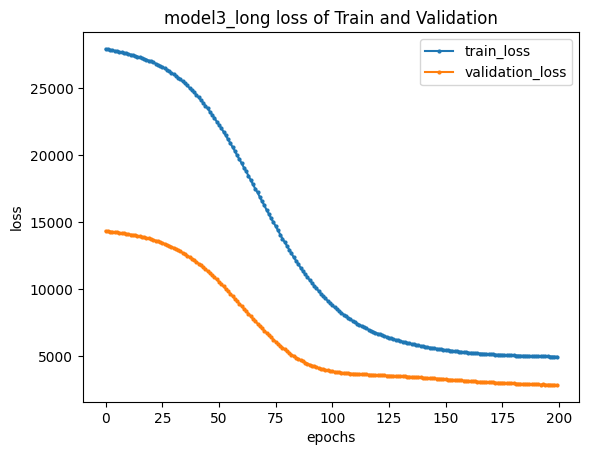

In [40]:
plt.title('model3_long loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist3_long.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist3_long.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()

In [41]:
preds = model3_long.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

1/1 [==============================] - 0s 66ms/step
결정계수 : 0.5484147881081972
평균제곱근오차 :  53.28296237270085


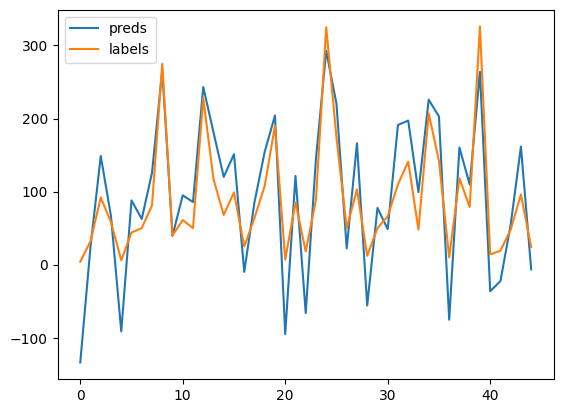

In [42]:
x_axis = [i for i in range(len(preds))]
plt.plot(x_axis,preds,label='preds')
plt.plot(x_axis,Y_val,label='labels')
plt.legend()

epoch을 늘렸더니 성능이 확실히 증가했습니다.
이를 더 늘려서 성능을 확인해 보겠습니다.
epoch을 500으로 바꿉니다.

In [43]:
# model2와 같은 model3_500 생성
model3_500 = tf.keras.Sequential()
model3_500.add(tf.keras.Input(shape = 3))
model3_500.add(Dense(20))
model3_500.add(Dense(20))
model3_500.add(Dense(1))

learning_rate = 5e-4
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 500 # 30에서 증가

model3_500.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model3_500.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                80        
                                                                 
 dense_12 (Dense)            (None, 20)                420       
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


/home/elicer/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [44]:
hist3_500 = model3_500.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/500
6/6 [==============================] - 1s 42ms/step - loss: 27946.4473 - mse: 27946.4473 - mae: 111.5766 - val_loss: 14355.8447 - val_mse: 14355.8447 - val_mae: 90.1790
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 27922.6953 - mse: 27922.6914 - mae: 111.5500 - val_loss: 14341.0361 - val_mse: 14341.0361 - val_mae: 90.1636
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 27898.2676 - mse: 27898.2676 - mae: 111.5225 - val_loss: 14325.6279 - val_mse: 14325.6279 - val_mae: 90.1472
Epoch 4/500
6/6 [==============================] - 0s 8ms/step - loss: 27873.6699 - mse: 27873.6699 - mae: 111.4957 - val_loss: 14309.5293 - val_mse: 14309.5293 - val_mae: 90.1290
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 27845.9668 - mse: 27845.9668 - mae: 111.4644 - val_loss: 14293.7588 - val_mse: 14293.7588 - val_mae: 90.1115
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 27819.4883 - mse: 27819.488

6/6 [==============================] - 0s 9ms/step - loss: 23721.9297 - mse: 23721.9297 - mae: 104.8740 - val_loss: 11525.5859 - val_mse: 11525.5859 - val_mae: 84.2563
Epoch 47/500
6/6 [==============================] - 0s 8ms/step - loss: 23495.8301 - mse: 23495.8301 - mae: 104.4674 - val_loss: 11374.4502 - val_mse: 11374.4502 - val_mae: 83.8696
Epoch 48/500
6/6 [==============================] - 0s 9ms/step - loss: 23265.1367 - mse: 23265.1367 - mae: 104.0410 - val_loss: 11216.3467 - val_mse: 11216.3467 - val_mae: 83.4586
Epoch 49/500
6/6 [==============================] - 0s 8ms/step - loss: 23032.9746 - mse: 23032.9746 - mae: 103.5675 - val_loss: 11049.1934 - val_mse: 11049.1934 - val_mae: 83.0180
Epoch 50/500
6/6 [==============================] - 0s 9ms/step - loss: 22777.9199 - mse: 22777.9199 - mae: 103.0859 - val_loss: 10880.8545 - val_mse: 10880.8545 - val_mae: 82.5689
Epoch 51/500
6/6 [==============================] - 0s 8ms/step - loss: 22498.5254 - mse: 22498.5254 - mae: 

Epoch 92/500
6/6 [==============================] - 0s 8ms/step - loss: 10240.9580 - mse: 10240.9580 - mae: 67.5503 - val_loss: 4066.2871 - val_mse: 4066.2871 - val_mae: 49.8411
Epoch 93/500
6/6 [==============================] - 0s 8ms/step - loss: 10028.7217 - mse: 10028.7217 - mae: 66.6073 - val_loss: 3994.3118 - val_mse: 3994.3118 - val_mae: 49.0344
Epoch 94/500
6/6 [==============================] - 0s 8ms/step - loss: 9814.4990 - mse: 9814.4990 - mae: 65.5349 - val_loss: 3926.3682 - val_mse: 3926.3682 - val_mae: 48.2172
Epoch 95/500
6/6 [==============================] - 0s 8ms/step - loss: 9598.7744 - mse: 9598.7734 - mae: 64.6235 - val_loss: 3866.3625 - val_mse: 3866.3625 - val_mae: 47.4566
Epoch 96/500
6/6 [==============================] - 0s 9ms/step - loss: 9397.0586 - mse: 9397.0586 - mae: 63.6526 - val_loss: 3810.2952 - val_mse: 3810.2952 - val_mae: 46.6935
Epoch 97/500
6/6 [==============================] - 0s 8ms/step - loss: 9202.8916 - mse: 9202.8916 - mae: 62.8084 - 

6/6 [==============================] - 0s 8ms/step - loss: 5692.5171 - mse: 5692.5171 - mae: 49.5209 - val_loss: 3315.6851 - val_mse: 3315.6851 - val_mae: 44.0577
Epoch 139/500
6/6 [==============================] - 0s 8ms/step - loss: 5663.0269 - mse: 5663.0269 - mae: 49.4594 - val_loss: 3307.3621 - val_mse: 3307.3621 - val_mae: 44.1377
Epoch 140/500
6/6 [==============================] - 0s 8ms/step - loss: 5634.4268 - mse: 5634.4268 - mae: 49.3859 - val_loss: 3286.2046 - val_mse: 3286.2046 - val_mae: 44.1240
Epoch 141/500
6/6 [==============================] - 0s 8ms/step - loss: 5610.6143 - mse: 5610.6143 - mae: 49.3481 - val_loss: 3291.3477 - val_mse: 3291.3477 - val_mae: 44.3047
Epoch 142/500
6/6 [==============================] - 0s 8ms/step - loss: 5579.5020 - mse: 5579.5020 - mae: 49.2847 - val_loss: 3274.9756 - val_mse: 3274.9756 - val_mae: 44.3277
Epoch 143/500
6/6 [==============================] - 0s 8ms/step - loss: 5551.0396 - mse: 5551.0396 - mae: 49.1824 - val_loss: 32

6/6 [==============================] - 0s 8ms/step - loss: 5010.0288 - mse: 5010.0288 - mae: 47.8853 - val_loss: 2879.6519 - val_mse: 2879.6519 - val_mae: 45.0874
Epoch 185/500
6/6 [==============================] - 0s 8ms/step - loss: 5000.2539 - mse: 5000.2539 - mae: 47.8451 - val_loss: 2880.8379 - val_mse: 2880.8379 - val_mae: 45.1571
Epoch 186/500
6/6 [==============================] - 0s 7ms/step - loss: 4994.3193 - mse: 4994.3193 - mae: 47.8430 - val_loss: 2875.2935 - val_mse: 2875.2935 - val_mae: 45.1663
Epoch 187/500
6/6 [==============================] - 0s 8ms/step - loss: 4990.8442 - mse: 4990.8442 - mae: 47.8345 - val_loss: 2865.2449 - val_mse: 2865.2449 - val_mae: 45.1396
Epoch 188/500
6/6 [==============================] - 0s 8ms/step - loss: 4985.6748 - mse: 4985.6748 - mae: 47.7958 - val_loss: 2856.9514 - val_mse: 2856.9514 - val_mae: 45.1258
Epoch 189/500
6/6 [==============================] - 0s 8ms/step - loss: 4981.7944 - mse: 4981.7944 - mae: 47.8131 - val_loss: 28

6/6 [==============================] - 0s 8ms/step - loss: 4899.3936 - mse: 4899.3936 - mae: 47.5546 - val_loss: 2719.4836 - val_mse: 2719.4836 - val_mae: 45.1160
Epoch 231/500
6/6 [==============================] - 0s 9ms/step - loss: 4898.6436 - mse: 4898.6436 - mae: 47.5650 - val_loss: 2724.1001 - val_mse: 2724.1001 - val_mae: 45.1686
Epoch 232/500
6/6 [==============================] - 0s 8ms/step - loss: 4900.5728 - mse: 4900.5728 - mae: 47.6207 - val_loss: 2733.0254 - val_mse: 2733.0254 - val_mae: 45.2615
Epoch 233/500
6/6 [==============================] - 0s 8ms/step - loss: 4901.9360 - mse: 4901.9360 - mae: 47.5817 - val_loss: 2709.1626 - val_mse: 2709.1626 - val_mae: 45.0732
Epoch 234/500
6/6 [==============================] - 0s 8ms/step - loss: 4896.5317 - mse: 4896.5317 - mae: 47.5226 - val_loss: 2712.9919 - val_mse: 2712.9919 - val_mae: 45.1117
Epoch 235/500
6/6 [==============================] - 0s 8ms/step - loss: 4896.3623 - mse: 4896.3623 - mae: 47.5608 - val_loss: 27

6/6 [==============================] - 0s 8ms/step - loss: 4887.3647 - mse: 4887.3647 - mae: 47.5193 - val_loss: 2667.9844 - val_mse: 2667.9844 - val_mae: 45.1043
Epoch 277/500
6/6 [==============================] - 0s 8ms/step - loss: 4887.5259 - mse: 4887.5259 - mae: 47.5064 - val_loss: 2666.7170 - val_mse: 2666.7170 - val_mae: 45.0963
Epoch 278/500
6/6 [==============================] - 0s 8ms/step - loss: 4890.1914 - mse: 4890.1914 - mae: 47.4739 - val_loss: 2656.2727 - val_mse: 2656.2727 - val_mae: 45.0097
Epoch 279/500
6/6 [==============================] - 0s 8ms/step - loss: 4887.4126 - mse: 4887.4126 - mae: 47.4570 - val_loss: 2657.0615 - val_mse: 2657.0615 - val_mae: 45.0220
Epoch 280/500
6/6 [==============================] - 0s 6ms/step - loss: 4887.5991 - mse: 4887.5991 - mae: 47.4743 - val_loss: 2658.9644 - val_mse: 2658.9644 - val_mae: 45.0453
Epoch 281/500
6/6 [==============================] - 0s 5ms/step - loss: 4887.7031 - mse: 4887.7031 - mae: 47.4935 - val_loss: 26

6/6 [==============================] - 0s 5ms/step - loss: 4891.6099 - mse: 4891.6099 - mae: 47.5463 - val_loss: 2652.6265 - val_mse: 2652.6265 - val_mae: 45.0766
Epoch 323/500
6/6 [==============================] - 0s 5ms/step - loss: 4888.1631 - mse: 4888.1631 - mae: 47.5139 - val_loss: 2662.3928 - val_mse: 2662.3928 - val_mae: 45.1698
Epoch 324/500
6/6 [==============================] - 0s 5ms/step - loss: 4887.4736 - mse: 4887.4736 - mae: 47.5689 - val_loss: 2669.3035 - val_mse: 2669.3035 - val_mae: 45.2266
Epoch 325/500
6/6 [==============================] - 0s 7ms/step - loss: 4887.2266 - mse: 4887.2266 - mae: 47.5496 - val_loss: 2660.4146 - val_mse: 2660.4146 - val_mae: 45.1522
Epoch 326/500
6/6 [==============================] - 0s 7ms/step - loss: 4886.8013 - mse: 4886.8013 - mae: 47.5209 - val_loss: 2658.0435 - val_mse: 2658.0435 - val_mae: 45.1270
Epoch 327/500
6/6 [==============================] - 0s 5ms/step - loss: 4886.5557 - mse: 4886.5557 - mae: 47.5166 - val_loss: 26

6/6 [==============================] - 0s 6ms/step - loss: 4886.7349 - mse: 4886.7349 - mae: 47.5170 - val_loss: 2655.8049 - val_mse: 2655.8049 - val_mae: 45.1369
Epoch 369/500
6/6 [==============================] - 0s 5ms/step - loss: 4887.5127 - mse: 4887.5127 - mae: 47.5511 - val_loss: 2665.4580 - val_mse: 2665.4580 - val_mae: 45.2185
Epoch 370/500
6/6 [==============================] - 0s 6ms/step - loss: 4886.3037 - mse: 4886.3037 - mae: 47.5641 - val_loss: 2664.6392 - val_mse: 2664.6392 - val_mae: 45.2103
Epoch 371/500
6/6 [==============================] - 0s 5ms/step - loss: 4886.9331 - mse: 4886.9331 - mae: 47.5615 - val_loss: 2665.0908 - val_mse: 2665.0908 - val_mae: 45.2135
Epoch 372/500
6/6 [==============================] - 0s 7ms/step - loss: 4888.3579 - mse: 4888.3574 - mae: 47.5446 - val_loss: 2655.6392 - val_mse: 2655.6392 - val_mae: 45.1359
Epoch 373/500
6/6 [==============================] - 0s 5ms/step - loss: 4887.2798 - mse: 4887.2798 - mae: 47.5399 - val_loss: 26

6/6 [==============================] - 0s 5ms/step - loss: 4886.5591 - mse: 4886.5591 - mae: 47.5690 - val_loss: 2660.5381 - val_mse: 2660.5381 - val_mae: 45.1797
Epoch 415/500
6/6 [==============================] - 0s 5ms/step - loss: 4886.0278 - mse: 4886.0278 - mae: 47.5414 - val_loss: 2660.4138 - val_mse: 2660.4138 - val_mae: 45.1800
Epoch 416/500
6/6 [==============================] - 0s 5ms/step - loss: 4887.5996 - mse: 4887.5996 - mae: 47.5176 - val_loss: 2650.6318 - val_mse: 2650.6318 - val_mae: 45.0945
Epoch 417/500
6/6 [==============================] - 0s 5ms/step - loss: 4888.2290 - mse: 4888.2290 - mae: 47.4684 - val_loss: 2641.1853 - val_mse: 2641.1853 - val_mae: 45.0131
Epoch 418/500
6/6 [==============================] - 0s 5ms/step - loss: 4887.5835 - mse: 4887.5835 - mae: 47.4758 - val_loss: 2655.1726 - val_mse: 2655.1726 - val_mae: 45.1318
Epoch 419/500
6/6 [==============================] - 0s 5ms/step - loss: 4887.8818 - mse: 4887.8818 - mae: 47.5170 - val_loss: 26

6/6 [==============================] - 0s 5ms/step - loss: 4886.8594 - mse: 4886.8594 - mae: 47.5602 - val_loss: 2662.1545 - val_mse: 2662.1545 - val_mae: 45.1934
Epoch 461/500
6/6 [==============================] - 0s 5ms/step - loss: 4887.7700 - mse: 4887.7700 - mae: 47.5774 - val_loss: 2666.1348 - val_mse: 2666.1348 - val_mae: 45.2213
Epoch 462/500
6/6 [==============================] - 0s 5ms/step - loss: 4887.5908 - mse: 4887.5908 - mae: 47.5471 - val_loss: 2655.9868 - val_mse: 2655.9868 - val_mae: 45.1379
Epoch 463/500
6/6 [==============================] - 0s 5ms/step - loss: 4886.8237 - mse: 4886.8237 - mae: 47.4988 - val_loss: 2650.7939 - val_mse: 2650.7939 - val_mae: 45.0885
Epoch 464/500
6/6 [==============================] - 0s 5ms/step - loss: 4886.9375 - mse: 4886.9375 - mae: 47.4745 - val_loss: 2649.4648 - val_mse: 2649.4648 - val_mae: 45.0756
Epoch 465/500
6/6 [==============================] - 0s 5ms/step - loss: 4888.0112 - mse: 4888.0112 - mae: 47.4685 - val_loss: 26

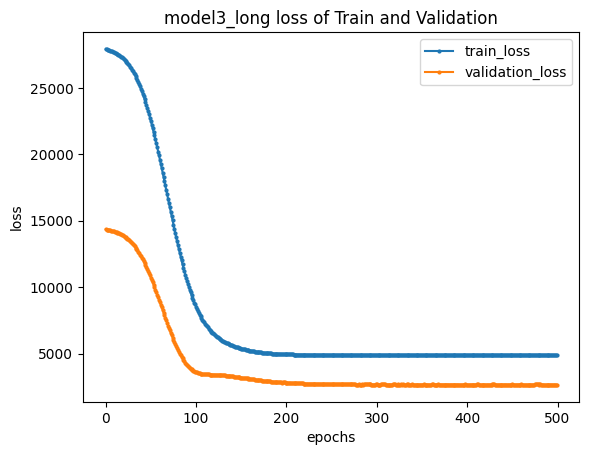

In [45]:
plt.title('model3_long loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist3_500.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist3_500.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()

In [46]:
import warnings
warnings.filterwarnings("ignore")
preds = model3_500.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

1/1 [==============================] - 0s 42ms/step
결정계수 : 0.579438371413096
평균제곱근오차 :  51.420148837855365


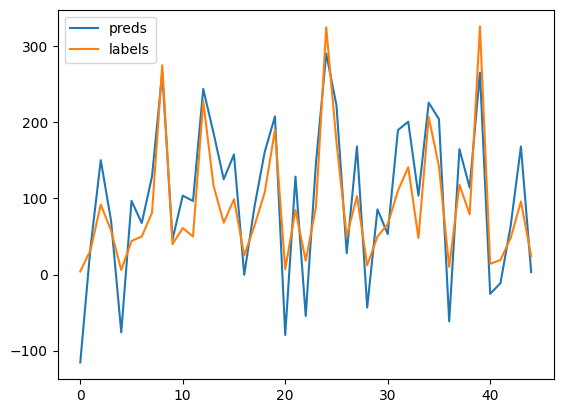

In [47]:
x_axis = [i for i in range(len(preds))]
plt.plot(x_axis,preds,label='preds')
plt.plot(x_axis,Y_val,label='labels')
plt.legend()

200번의 epoch으로 성능이 꽤 안정화 되었습니다.
현재 모델에서는 이 정도면 충분히 학습이 되는 것 같습니다.

### 3.8 배치 사이즈와 학습률 수정해보기

학습에 큰 영향을 미치는 파라미터로 배치 사이즈와 학습률이 있습니다. 두 파라미터들을 조정하여 봅시다.

In [48]:
# model2와 같은 model4 생성
model4 = tf.keras.Sequential()
model4.add(tf.keras.Input(shape = 3))
model4.add(Dense(20))
model4.add(Dense(20))
model4.add(Dense(1))

In [49]:
# learning rate를 크게 수정
learning_rate = 5e-3
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 60

model4.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 20)                80        
                                                                 
 dense_15 (Dense)            (None, 20)                420       
                                                                 
 dense_16 (Dense)            (None, 1)                 21        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [50]:
hist4 = model4.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/60
6/6 [==============================] - 0s 23ms/step - loss: 28055.8477 - mse: 28055.8477 - mae: 111.4695 - val_loss: 14297.5615 - val_mse: 14297.5615 - val_mae: 89.7757
Epoch 2/60
6/6 [==============================] - 0s 5ms/step - loss: 27755.3223 - mse: 27755.3223 - mae: 111.0385 - val_loss: 14114.6475 - val_mse: 14114.6475 - val_mae: 89.4519
Epoch 3/60
6/6 [==============================] - 0s 5ms/step - loss: 27427.7852 - mse: 27427.7852 - mae: 110.5323 - val_loss: 13832.1406 - val_mse: 13832.1406 - val_mae: 88.9109
Epoch 4/60
6/6 [==============================] - 0s 5ms/step - loss: 26869.0254 - mse: 26869.0254 - mae: 109.5916 - val_loss: 13420.3525 - val_mse: 13420.3525 - val_mae: 88.0614
Epoch 5/60
6/6 [==============================] - 0s 5ms/step - loss: 26134.1367 - mse: 26134.1367 - mae: 108.3926 - val_loss: 12805.4023 - val_mse: 12805.4023 - val_mae: 86.6588
Epoch 6/60
6/6 [==============================] - 0s 5ms/step - loss: 24989.0859 - mse: 24989.0859 - mae

6/6 [==============================] - 0s 5ms/step - loss: 4913.7959 - mse: 4913.7959 - mae: 47.6167 - val_loss: 2573.4612 - val_mse: 2573.4612 - val_mae: 44.3411
Epoch 48/60
6/6 [==============================] - 0s 5ms/step - loss: 4927.0034 - mse: 4927.0034 - mae: 46.8977 - val_loss: 2484.8381 - val_mse: 2484.8381 - val_mae: 43.5338
Epoch 49/60
6/6 [==============================] - 0s 5ms/step - loss: 4896.6353 - mse: 4896.6353 - mae: 46.8157 - val_loss: 2552.7959 - val_mse: 2552.7959 - val_mae: 44.2327
Epoch 50/60
6/6 [==============================] - 0s 5ms/step - loss: 4915.1377 - mse: 4915.1377 - mae: 47.0956 - val_loss: 2543.1174 - val_mse: 2543.1174 - val_mae: 44.2335
Epoch 51/60
6/6 [==============================] - 0s 5ms/step - loss: 4913.7056 - mse: 4913.7051 - mae: 47.7031 - val_loss: 2763.2080 - val_mse: 2763.2080 - val_mae: 46.1106
Epoch 52/60
6/6 [==============================] - 0s 5ms/step - loss: 4923.5366 - mse: 4923.5366 - mae: 48.6835 - val_loss: 2886.1602 - 

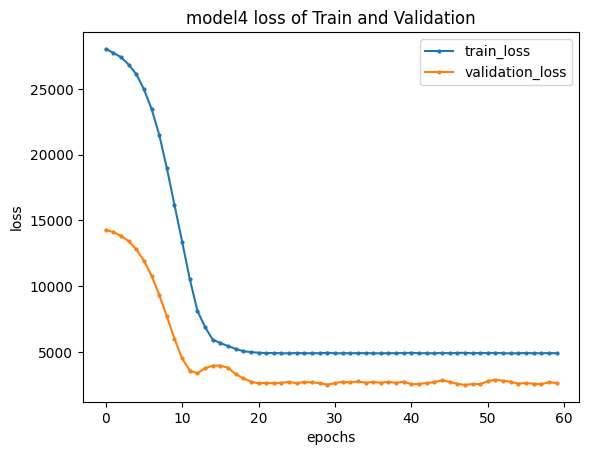

In [51]:
plt.title('model4 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist4.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist4.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()

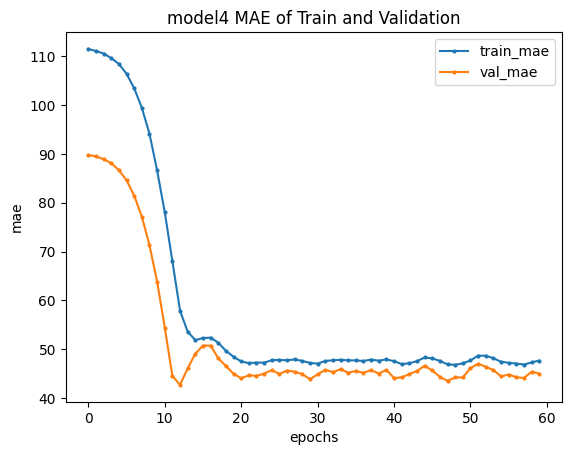

In [52]:
plt.title('model4 MAE of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.plot(hist4.history['mae'], marker = 'o', ms = 2, label='train_mae')
plt.plot(hist4.history['val_mae'], marker = 'o', ms = 2, label='val_mae')
plt.legend()

In [53]:
preds = model4.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

1/1 [==============================] - 0s 39ms/step
결정계수 : 0.5808243127762269
평균제곱근오차 :  51.33535256050864


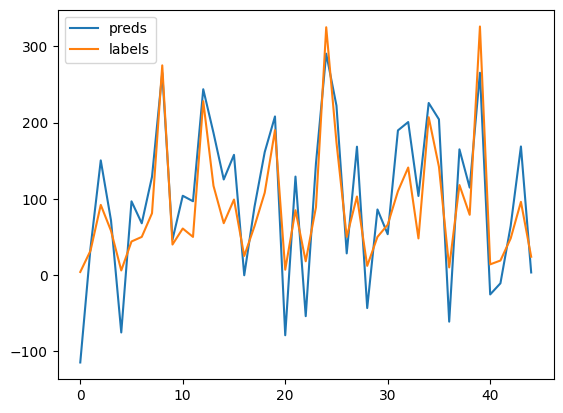

In [54]:
x_axis = [i for i in range(len(preds))]
plt.plot(x_axis,preds,label='preds')
plt.plot(x_axis,Y_val,label='labels')
plt.legend()

훨씬 좋아졌습니다!

배치 사이즈를 크게 하여 돌려 보겠습니다.

In [55]:
# model2와 같은 model5 생성
model5 = tf.keras.Sequential()
model5.add(tf.keras.Input(shape = 3))
model5.add(Dense(20))
model5.add(Dense(20))
model5.add(Dense(1))

In [56]:
learning_rate = 5e-3
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 60

model5.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 20)                80        
                                                                 
 dense_18 (Dense)            (None, 20)                420       
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Batch size를 늘려서 실행
hist5 = model5.fit(X_train, Y_train, batch_size=100, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/60
2/2 [==============================] - 1s 175ms/step - loss: 28118.6270 - mse: 28118.6270 - mae: 111.5762 - val_loss: 14389.4473 - val_mse: 14389.4473 - val_mae: 89.9580
Epoch 2/60
2/2 [==============================] - 0s 28ms/step - loss: 28015.9688 - mse: 28015.9688 - mae: 111.4677 - val_loss: 14315.5713 - val_mse: 14315.5713 - val_mae: 89.8499
Epoch 3/60
2/2 [==============================] - 0s 30ms/step - loss: 27906.1387 - mse: 27906.1387 - mae: 111.3656 - val_loss: 14238.8848 - val_mse: 14238.8848 - val_mae: 89.7329
Epoch 4/60
2/2 [==============================] - 0s 28ms/step - loss: 27794.3613 - mse: 27794.3613 - mae: 111.2446 - val_loss: 14157.6338 - val_mse: 14157.6338 - val_mae: 89.6043
Epoch 5/60
2/2 [==============================] - 0s 30ms/step - loss: 27683.5840 - mse: 27683.5840 - mae: 111.1302 - val_loss: 14069.5127 - val_mse: 14069.5127 - val_mae: 89.4575
Epoch 6/60
2/2 [==============================] - 0s 27ms/step - loss: 27557.8945 - mse: 27557.8926

Epoch 47/60
2/2 [==============================] - 0s 32ms/step - loss: 6134.3682 - mse: 6134.3682 - mae: 53.5894 - val_loss: 4544.0034 - val_mse: 4544.0034 - val_mae: 50.1446
Epoch 48/60
2/2 [==============================] - 0s 32ms/step - loss: 5963.1123 - mse: 5963.1123 - mae: 52.8070 - val_loss: 4323.5649 - val_mse: 4323.5649 - val_mae: 49.7084
Epoch 49/60
2/2 [==============================] - 0s 32ms/step - loss: 5793.0327 - mse: 5793.0327 - mae: 52.0717 - val_loss: 4093.2720 - val_mse: 4093.2720 - val_mae: 49.0887
Epoch 50/60
2/2 [==============================] - 0s 33ms/step - loss: 5653.6138 - mse: 5653.6138 - mae: 51.3663 - val_loss: 3864.7642 - val_mse: 3864.7642 - val_mae: 48.3595
Epoch 51/60
2/2 [==============================] - 0s 33ms/step - loss: 5503.6055 - mse: 5503.6055 - mae: 50.6892 - val_loss: 3664.1133 - val_mse: 3664.1133 - val_mae: 47.6862
Epoch 52/60
2/2 [==============================] - 0s 33ms/step - loss: 5404.2583 - mse: 5404.2583 - mae: 50.1227 - val_

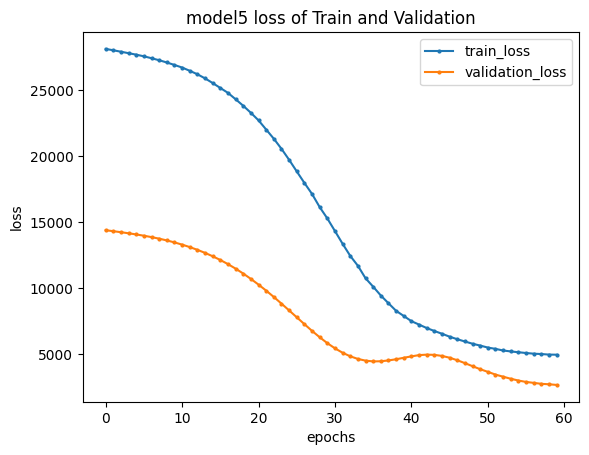

In [58]:
plt.title('model5 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist5.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist5.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()

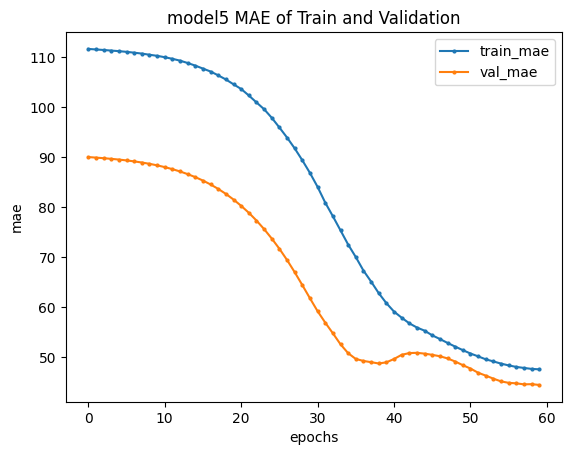

In [59]:
plt.title('model5 MAE of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.plot(hist5.history['mae'], marker = 'o', ms = 2, label='train_mae')
plt.plot(hist5.history['val_mae'], marker = 'o', ms = 2, label='val_mae')
plt.legend()

In [60]:
preds = model5.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

1/1 [==============================] - 0s 67ms/step
결정계수 : 0.5746289633144248
평균제곱근오차 :  51.71332523001643


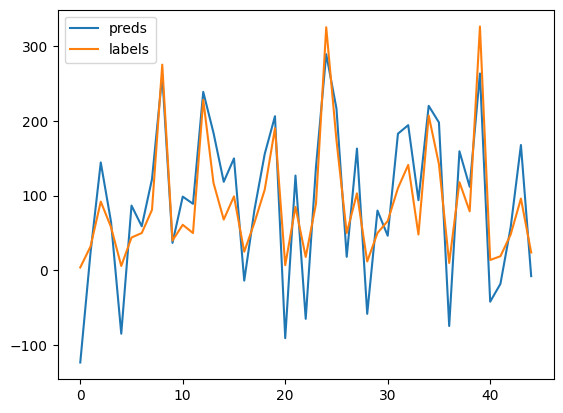

In [61]:
x_axis = [i for i in range(len(preds))]
plt.plot(x_axis,preds,label='preds')
plt.plot(x_axis,Y_val,label='labels')
plt.legend()

### 3.9. 모델 복잡도 늘려보기

이제, 대략적인 감을 잡았으니, 모델의 복잡도를 늘려 보겠습니다.

비교 가능한 대상은 4일차 실습에서 sklearn으로 구현한 MLPRegressor (RMSE : 7) 입니다.

In [62]:
# 지금까지 확인 가능한 사실
# learning rate는 5e-4보다는 5e-3이 더 좋다
# 5e-3의 learning rate로는 60회 이내에 학습이 충분히 된다
# 그런데, 모델이 더 복잡하다면 어떨까?
# learning rate를 크게 수정

# model6 생성 (model 복잡도 추가)
model6 = tf.keras.Sequential()
model6.add(tf.keras.Input(shape = 3))
model6.add(Dense(20))
model6.add(Dense(20))
model6.add(Dense(20))
model6.add(Dense(1))

learning_rate = 5e-3
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 60

model6.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                80        
                                                                 
 dense_21 (Dense)            (None, 20)                420       
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________


In [63]:
hist6 = model6.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/60
6/6 [==============================] - 1s 86ms/step - loss: 27832.1426 - mse: 27832.1426 - mae: 111.4267 - val_loss: 14020.1084 - val_mse: 14020.1084 - val_mae: 89.3951
Epoch 2/60
6/6 [==============================] - 0s 7ms/step - loss: 27196.5332 - mse: 27196.5332 - mae: 110.5257 - val_loss: 13390.6709 - val_mse: 13390.6709 - val_mae: 88.1701
Epoch 3/60
6/6 [==============================] - 0s 7ms/step - loss: 25987.9609 - mse: 25987.9609 - mae: 108.9552 - val_loss: 12293.1387 - val_mse: 12293.1387 - val_mae: 85.8322
Epoch 4/60
6/6 [==============================] - 0s 7ms/step - loss: 23925.4277 - mse: 23925.4277 - mae: 106.0479 - val_loss: 10454.2998 - val_mse: 10454.2998 - val_mae: 81.3671
Epoch 5/60
6/6 [==============================] - 0s 7ms/step - loss: 20701.4629 - mse: 20701.4629 - mae: 99.8053 - val_loss: 7812.2012 - val_mse: 7812.2012 - val_mae: 73.2168
Epoch 6/60
6/6 [==============================] - 0s 7ms/step - loss: 15676.4219 - mse: 15676.4219 - mae: 8

Epoch 48/60
6/6 [==============================] - 0s 6ms/step - loss: 4898.3564 - mse: 4898.3564 - mae: 48.6075 - val_loss: 2708.9846 - val_mse: 2708.9846 - val_mae: 45.5784
Epoch 49/60
6/6 [==============================] - 0s 5ms/step - loss: 4934.0728 - mse: 4934.0728 - mae: 47.1251 - val_loss: 2458.2576 - val_mse: 2458.2576 - val_mae: 43.4454
Epoch 50/60
6/6 [==============================] - 0s 5ms/step - loss: 4925.7803 - mse: 4925.7803 - mae: 46.6460 - val_loss: 2522.9316 - val_mse: 2522.9316 - val_mae: 43.9979
Epoch 51/60
6/6 [==============================] - 0s 5ms/step - loss: 4917.9263 - mse: 4917.9263 - mae: 47.6020 - val_loss: 2772.4048 - val_mse: 2772.4048 - val_mae: 46.1790
Epoch 52/60
6/6 [==============================] - 0s 5ms/step - loss: 4903.1240 - mse: 4903.1240 - mae: 48.2649 - val_loss: 2667.5510 - val_mse: 2667.5510 - val_mae: 45.2737
Epoch 53/60
6/6 [==============================] - 0s 5ms/step - loss: 4926.3457 - mse: 4926.3457 - mae: 47.6963 - val_loss: 

1/1 [==============================] - 0s 78ms/step
결정계수 : 0.5877404718811393
평균제곱근오차 :  50.91008913493788


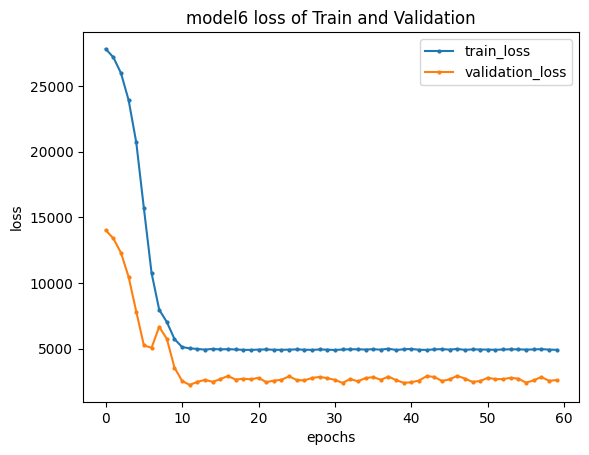

In [64]:
plt.title('model6 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist6.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist6.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()
preds = model6.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

레이어를 늘리는 것은 성능에 큰 영향이 없을지도 모르겠습니다.

대신, 각 레이어의 유닛 수를 늘려 보겠습니다.

In [65]:
# model7 생성 (model 복잡도 추가)
model7 = tf.keras.Sequential()
model7.add(tf.keras.Input(shape = 3))
model7.add(Dense(50))
model7.add(Dense(50))
model7.add(Dense(1))

learning_rate = 5e-3
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 60

model7.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                200       
                                                                 
 dense_25 (Dense)            (None, 50)                2550      
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


In [66]:
hist7 = model7.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/60
6/6 [==============================] - 1s 42ms/step - loss: 27576.0723 - mse: 27576.0723 - mae: 111.2845 - val_loss: 13725.5088 - val_mse: 13725.5088 - val_mae: 89.3676
Epoch 2/60
6/6 [==============================] - 0s 9ms/step - loss: 26508.4688 - mse: 26508.4688 - mae: 110.1893 - val_loss: 12762.1914 - val_mse: 12762.1914 - val_mae: 87.8227
Epoch 3/60
6/6 [==============================] - 0s 9ms/step - loss: 24726.6270 - mse: 24726.6270 - mae: 108.0719 - val_loss: 11279.4902 - val_mse: 11279.4902 - val_mae: 84.8364
Epoch 4/60
6/6 [==============================] - 0s 9ms/step - loss: 21795.5098 - mse: 21795.5098 - mae: 103.4369 - val_loss: 9278.5156 - val_mse: 9278.5156 - val_mae: 79.7151
Epoch 5/60
6/6 [==============================] - 0s 9ms/step - loss: 18196.9531 - mse: 18196.9531 - mae: 96.4554 - val_loss: 6973.1543 - val_mse: 6973.1543 - val_mae: 71.3412
Epoch 6/60
6/6 [==============================] - 0s 9ms/step - loss: 13755.2822 - mse: 13755.2822 - mae: 85.

Epoch 48/60
6/6 [==============================] - 0s 8ms/step - loss: 4923.2988 - mse: 4923.2988 - mae: 46.9834 - val_loss: 2580.6030 - val_mse: 2580.6030 - val_mae: 44.4647
Epoch 49/60
6/6 [==============================] - 0s 8ms/step - loss: 4906.4473 - mse: 4906.4473 - mae: 47.6912 - val_loss: 2785.6941 - val_mse: 2785.6941 - val_mae: 46.2439
Epoch 50/60
6/6 [==============================] - 0s 9ms/step - loss: 4922.2256 - mse: 4922.2256 - mae: 47.9009 - val_loss: 2607.3616 - val_mse: 2607.3616 - val_mae: 44.7878
Epoch 51/60
6/6 [==============================] - 0s 9ms/step - loss: 4903.2441 - mse: 4903.2441 - mae: 47.5917 - val_loss: 2657.8049 - val_mse: 2657.8049 - val_mae: 45.1564
Epoch 52/60
6/6 [==============================] - 0s 8ms/step - loss: 4966.5312 - mse: 4966.5312 - mae: 48.6390 - val_loss: 2877.6799 - val_mse: 2877.6799 - val_mae: 47.0042
Epoch 53/60
6/6 [==============================] - 0s 8ms/step - loss: 4912.3501 - mse: 4912.3501 - mae: 48.1321 - val_loss: 

1/1 [==============================] - 0s 65ms/step
결정계수 : 0.5874269270298942
평균제곱근오차 :  50.92944534297337


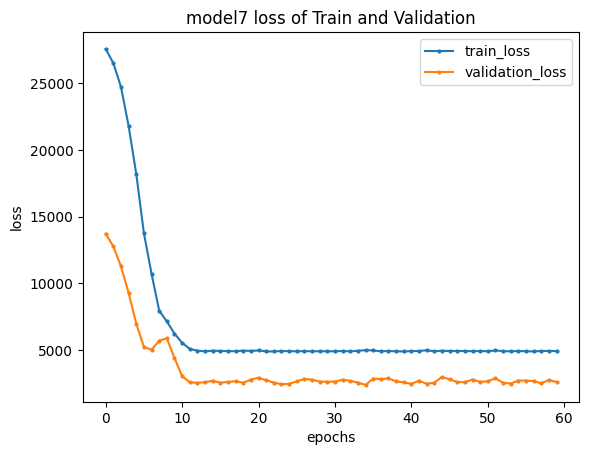

In [67]:
plt.title('model7 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist7.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist7.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()
preds = model7.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

이번에는 Layer 수와 Unit 수를 모두 늘려 보겠습니다.

In [68]:
# model8 생성 (model 복잡도 추가)
model8 = tf.keras.Sequential()
model8.add(tf.keras.Input(shape = 3))
model8.add(Dense(150))
model8.add(Dense(100))
model8.add(Dense(50))
model8.add(Dense(1))

learning_rate = 5e-3
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 60

model8.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 150)               600       
                                                                 
 dense_28 (Dense)            (None, 100)               15100     
                                                                 
 dense_29 (Dense)            (None, 50)                5050      
                                                                 
 dense_30 (Dense)            (None, 1)                 51        
                                                                 
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


In [69]:
hist8 = model8.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/60
6/6 [==============================] - 1s 44ms/step - loss: 26503.0176 - mse: 26503.0176 - mae: 110.7295 - val_loss: 11868.3525 - val_mse: 11868.3525 - val_mae: 88.4830
Epoch 2/60
6/6 [==============================] - 0s 9ms/step - loss: 18376.1895 - mse: 18376.1895 - mae: 99.0906 - val_loss: 6821.3350 - val_mse: 6821.3350 - val_mae: 68.7978
Epoch 3/60
6/6 [==============================] - 0s 9ms/step - loss: 11214.7012 - mse: 11214.7012 - mae: 78.0055 - val_loss: 10256.2031 - val_mse: 10256.2031 - val_mae: 76.2759
Epoch 4/60
6/6 [==============================] - 0s 8ms/step - loss: 6850.0444 - mse: 6850.0444 - mae: 61.7958 - val_loss: 2741.8765 - val_mse: 2741.8765 - val_mae: 41.5803
Epoch 5/60
6/6 [==============================] - 0s 8ms/step - loss: 5763.0972 - mse: 5763.0972 - mae: 45.7535 - val_loss: 1614.6752 - val_mse: 1614.6752 - val_mae: 35.1033
Epoch 6/60
6/6 [==============================] - 0s 9ms/step - loss: 5195.4980 - mse: 5195.4980 - mae: 46.3312 - val_

Epoch 48/60
6/6 [==============================] - 0s 9ms/step - loss: 4894.7192 - mse: 4894.7192 - mae: 47.9355 - val_loss: 2153.0537 - val_mse: 2153.0537 - val_mae: 40.0514
Epoch 49/60
6/6 [==============================] - 0s 9ms/step - loss: 5114.4321 - mse: 5114.4321 - mae: 47.1711 - val_loss: 2908.0483 - val_mse: 2908.0483 - val_mae: 47.5204
Epoch 50/60
6/6 [==============================] - 0s 9ms/step - loss: 4979.1567 - mse: 4979.1567 - mae: 47.8740 - val_loss: 2681.8430 - val_mse: 2681.8430 - val_mae: 45.6448
Epoch 51/60
6/6 [==============================] - 0s 9ms/step - loss: 5119.8047 - mse: 5119.8047 - mae: 47.2843 - val_loss: 2180.8113 - val_mse: 2180.8113 - val_mae: 40.2420
Epoch 52/60
6/6 [==============================] - 0s 9ms/step - loss: 5106.2847 - mse: 5106.2847 - mae: 47.8653 - val_loss: 3472.1084 - val_mse: 3472.1084 - val_mae: 51.9210
Epoch 53/60
6/6 [==============================] - 0s 9ms/step - loss: 5167.3696 - mse: 5167.3696 - mae: 49.1656 - val_loss: 

1/1 [==============================] - 0s 81ms/step
결정계수 : 0.4972662942656646
평균제곱근오차 :  56.21956853391203


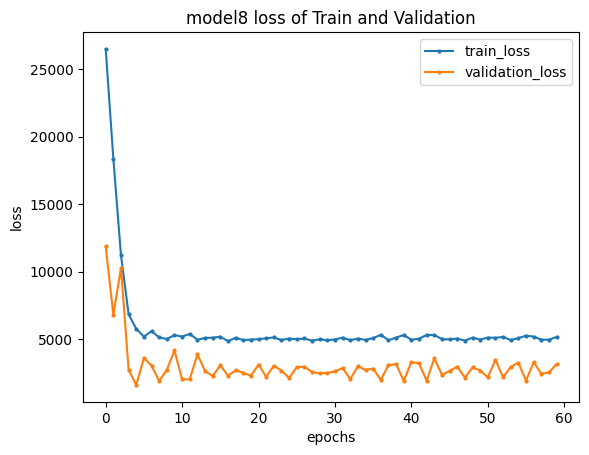

In [70]:
plt.title('model8 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist8.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist8.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()
preds = model8.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

모델을 더 크게 쌓아 보겠습니다.

4일차 실습자료에서 MLPRegressor에 넣어 줬던 모델 사이즈와 동일하게 넣습니다.

In [71]:
# model9 생성 (model 복잡도 추가)
model9 = tf.keras.Sequential()
model9.add(tf.keras.Input(shape = 3))
model9.add(Dense(300))
model9.add(Dense(200))
model9.add(Dense(150))
model9.add(Dense(100))
model9.add(Dense(50))
model9.add(Dense(1))

learning_rate = 5e-3
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 60

model9.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model9.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 300)               1200      
                                                                 
 dense_32 (Dense)            (None, 200)               60200     
                                                                 
 dense_33 (Dense)            (None, 150)               30150     
                                                                 
 dense_34 (Dense)            (None, 100)               15100     
                                                                 
 dense_35 (Dense)            (None, 50)                5050      
                                                                 
 dense_36 (Dense)            (None, 1)                 51        
                                                                 
Total params: 111,751
Trainable params: 111,751
Non-t

In [72]:
hist9 = model9.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/60
6/6 [==============================] - 1s 42ms/step - loss: 19236.9258 - mse: 19236.9258 - mae: 96.3311 - val_loss: 10586.8789 - val_mse: 10586.8789 - val_mae: 72.2786
Epoch 2/60
6/6 [==============================] - 0s 9ms/step - loss: 9524.3301 - mse: 9524.3301 - mae: 68.2251 - val_loss: 9425.6943 - val_mse: 9425.6943 - val_mae: 81.9084
Epoch 3/60
6/6 [==============================] - 0s 8ms/step - loss: 6618.3667 - mse: 6618.3667 - mae: 55.6770 - val_loss: 1961.5719 - val_mse: 1961.5719 - val_mae: 36.3819
Epoch 4/60
6/6 [==============================] - 0s 7ms/step - loss: 6074.7002 - mse: 6074.7002 - mae: 57.5305 - val_loss: 1691.2795 - val_mse: 1691.2795 - val_mae: 34.3653
Epoch 5/60
6/6 [==============================] - 0s 8ms/step - loss: 6030.4263 - mse: 6030.4263 - mae: 47.2636 - val_loss: 9202.3809 - val_mse: 9202.3809 - val_mae: 81.7259
Epoch 6/60
6/6 [==============================] - 0s 9ms/step - loss: 6916.7627 - mse: 6916.7627 - mae: 55.1814 - val_loss: 1

Epoch 48/60
6/6 [==============================] - 0s 8ms/step - loss: 6353.6270 - mse: 6353.6270 - mae: 60.1190 - val_loss: 2100.8052 - val_mse: 2100.8052 - val_mae: 38.7467
Epoch 49/60
6/6 [==============================] - 0s 8ms/step - loss: 5740.8062 - mse: 5740.8062 - mae: 46.0859 - val_loss: 3878.9143 - val_mse: 3878.9143 - val_mae: 54.5452
Epoch 50/60
6/6 [==============================] - 0s 8ms/step - loss: 5176.7075 - mse: 5176.7075 - mae: 49.3043 - val_loss: 2704.8740 - val_mse: 2704.8740 - val_mae: 45.8970
Epoch 51/60
6/6 [==============================] - 0s 8ms/step - loss: 5182.3169 - mse: 5182.3169 - mae: 50.5779 - val_loss: 1961.4062 - val_mse: 1961.4062 - val_mae: 37.1689
Epoch 52/60
6/6 [==============================] - 0s 8ms/step - loss: 5574.1548 - mse: 5574.1548 - mae: 50.6137 - val_loss: 2235.7581 - val_mse: 2235.7581 - val_mae: 40.3593
Epoch 53/60
6/6 [==============================] - 0s 8ms/step - loss: 5237.2173 - mse: 5237.2173 - mae: 45.0436 - val_loss: 

1/1 [==============================] - 0s 85ms/step
결정계수 : 0.7419359186344869
평균제곱근오차 :  40.27933457201166


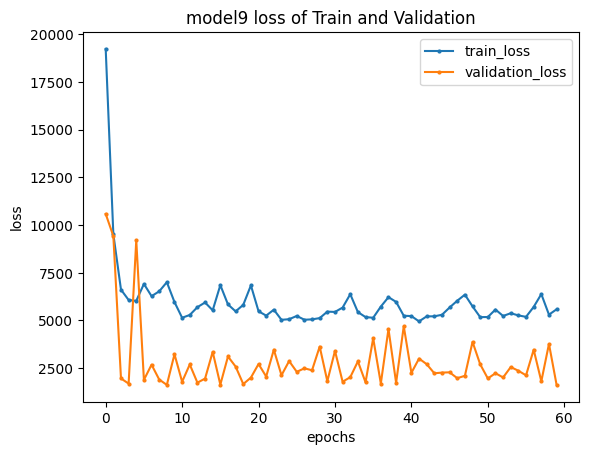

In [73]:
plt.title('model9 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist9.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist9.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()
preds = model9.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

Loss의 변화가 완만하지 않고 너무 급격하게 변하는데, 이를 해결하기 위해서 Learning rate를 줄이고 epoch을 늘려 보겠습니다.

In [74]:
# model10 생성 (model 복잡도 추가)
model10 = tf.keras.Sequential()
model10.add(tf.keras.Input(shape = 3))
model10.add(Dense(300))
model10.add(Dense(200))
model10.add(Dense(150))
model10.add(Dense(100))
model10.add(Dense(50))
model10.add(Dense(1))

learning_rate = 5e-5 # 1/100로 줄임
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 600 # 대신 10배로 늘림

model10.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model10.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 300)               1200      
                                                                 
 dense_38 (Dense)            (None, 200)               60200     
                                                                 
 dense_39 (Dense)            (None, 150)               30150     
                                                                 
 dense_40 (Dense)            (None, 100)               15100     
                                                                 
 dense_41 (Dense)            (None, 50)                5050      
                                                                 
 dense_42 (Dense)            (None, 1)                 51        
                                                                 
Total params: 111,751
Trainable params: 111,751
Non-t

In [75]:
hist10 = model10.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/600
6/6 [==============================] - 1s 50ms/step - loss: 28023.2031 - mse: 28023.2031 - mae: 111.5827 - val_loss: 14376.1025 - val_mse: 14376.1025 - val_mae: 90.0714
Epoch 2/600
6/6 [==============================] - 0s 10ms/step - loss: 27979.4492 - mse: 27979.4492 - mae: 111.5691 - val_loss: 14350.6699 - val_mse: 14350.6699 - val_mae: 90.0708
Epoch 3/600
6/6 [==============================] - 0s 10ms/step - loss: 27936.3965 - mse: 27936.3965 - mae: 111.5466 - val_loss: 14323.4961 - val_mse: 14323.4961 - val_mae: 90.0678
Epoch 4/600
6/6 [==============================] - 0s 9ms/step - loss: 27887.1035 - mse: 27887.1035 - mae: 111.5263 - val_loss: 14294.2891 - val_mse: 14294.2891 - val_mae: 90.0596
Epoch 5/600
6/6 [==============================] - 0s 10ms/step - loss: 27835.3770 - mse: 27835.3770 - mae: 111.4914 - val_loss: 14262.4551 - val_mse: 14262.4551 - val_mae: 90.0503
Epoch 6/600
6/6 [==============================] - 0s 9ms/step - loss: 27783.1035 - mse: 27783.1

6/6 [==============================] - 0s 10ms/step - loss: 10723.9580 - mse: 10723.9580 - mae: 75.8156 - val_loss: 7863.9307 - val_mse: 7863.9312 - val_mae: 64.9570
Epoch 47/600
6/6 [==============================] - 0s 9ms/step - loss: 10557.9600 - mse: 10557.9600 - mae: 74.8075 - val_loss: 7790.2627 - val_mse: 7790.2627 - val_mae: 64.2736
Epoch 48/600
6/6 [==============================] - 0s 10ms/step - loss: 10383.9229 - mse: 10383.9229 - mae: 73.7971 - val_loss: 7663.5850 - val_mse: 7663.5850 - val_mae: 63.4813
Epoch 49/600
6/6 [==============================] - 0s 9ms/step - loss: 10235.3760 - mse: 10235.3760 - mae: 72.9115 - val_loss: 7454.5200 - val_mse: 7454.5200 - val_mae: 62.6140
Epoch 50/600
6/6 [==============================] - 0s 10ms/step - loss: 10048.5000 - mse: 10048.5000 - mae: 71.8961 - val_loss: 7353.7183 - val_mse: 7353.7183 - val_mae: 61.7891
Epoch 51/600
6/6 [==============================] - 0s 9ms/step - loss: 9898.5371 - mse: 9898.5371 - mae: 71.0656 - val_

6/6 [==============================] - 0s 9ms/step - loss: 5248.2622 - mse: 5248.2622 - mae: 49.0487 - val_loss: 3151.9070 - val_mse: 3151.9070 - val_mae: 45.7137
Epoch 93/600
6/6 [==============================] - 0s 9ms/step - loss: 5212.9238 - mse: 5212.9238 - mae: 48.8714 - val_loss: 3094.0916 - val_mse: 3094.0916 - val_mae: 45.4781
Epoch 94/600
6/6 [==============================] - 0s 9ms/step - loss: 5174.5195 - mse: 5174.5195 - mae: 48.6942 - val_loss: 3065.3010 - val_mse: 3065.3010 - val_mae: 45.4244
Epoch 95/600
6/6 [==============================] - 0s 9ms/step - loss: 5142.5620 - mse: 5142.5620 - mae: 48.5114 - val_loss: 3024.4937 - val_mse: 3024.4937 - val_mae: 45.2740
Epoch 96/600
6/6 [==============================] - 0s 9ms/step - loss: 5115.5669 - mse: 5115.5669 - mae: 48.3985 - val_loss: 2981.6851 - val_mse: 2981.6851 - val_mae: 45.1386
Epoch 97/600
6/6 [==============================] - 0s 9ms/step - loss: 5086.9727 - mse: 5086.9727 - mae: 48.3158 - val_loss: 2980.90

6/6 [==============================] - 0s 9ms/step - loss: 4891.4702 - mse: 4891.4702 - mae: 47.4058 - val_loss: 2648.3933 - val_mse: 2648.3933 - val_mae: 44.9925
Epoch 139/600
6/6 [==============================] - 0s 9ms/step - loss: 4891.0234 - mse: 4891.0234 - mae: 47.4828 - val_loss: 2675.2329 - val_mse: 2675.2329 - val_mae: 45.2528
Epoch 140/600
6/6 [==============================] - 0s 9ms/step - loss: 4896.2217 - mse: 4896.2217 - mae: 47.5291 - val_loss: 2642.4568 - val_mse: 2642.4568 - val_mae: 44.9797
Epoch 141/600
6/6 [==============================] - 0s 9ms/step - loss: 4889.1987 - mse: 4889.1987 - mae: 47.4146 - val_loss: 2646.6443 - val_mse: 2646.6443 - val_mae: 45.0251
Epoch 142/600
6/6 [==============================] - 0s 10ms/step - loss: 4888.7588 - mse: 4888.7588 - mae: 47.4549 - val_loss: 2661.6079 - val_mse: 2661.6079 - val_mae: 45.1437
Epoch 143/600
6/6 [==============================] - 0s 9ms/step - loss: 4890.7583 - mse: 4890.7583 - mae: 47.5317 - val_loss: 2

6/6 [==============================] - 0s 9ms/step - loss: 4900.5522 - mse: 4900.5522 - mae: 47.4244 - val_loss: 2629.4546 - val_mse: 2629.4546 - val_mae: 44.9309
Epoch 185/600
6/6 [==============================] - 0s 9ms/step - loss: 4890.5449 - mse: 4890.5449 - mae: 47.4129 - val_loss: 2642.8545 - val_mse: 2642.8545 - val_mae: 45.0587
Epoch 186/600
6/6 [==============================] - 0s 9ms/step - loss: 4893.5757 - mse: 4893.5757 - mae: 47.4123 - val_loss: 2641.0544 - val_mse: 2641.0544 - val_mae: 45.0319
Epoch 187/600
6/6 [==============================] - 0s 9ms/step - loss: 4894.2915 - mse: 4894.2915 - mae: 47.5246 - val_loss: 2642.7791 - val_mse: 2642.7791 - val_mae: 45.0424
Epoch 188/600
6/6 [==============================] - 0s 9ms/step - loss: 4887.9956 - mse: 4887.9956 - mae: 47.5745 - val_loss: 2677.7227 - val_mse: 2677.7227 - val_mae: 45.3485
Epoch 189/600
6/6 [==============================] - 0s 9ms/step - loss: 4892.0684 - mse: 4892.0684 - mae: 47.7158 - val_loss: 26

6/6 [==============================] - 0s 9ms/step - loss: 4893.2275 - mse: 4893.2275 - mae: 47.3482 - val_loss: 2631.2566 - val_mse: 2631.2566 - val_mae: 44.9311
Epoch 231/600
6/6 [==============================] - 0s 9ms/step - loss: 4893.1523 - mse: 4893.1523 - mae: 47.4034 - val_loss: 2633.4746 - val_mse: 2633.4746 - val_mae: 44.9714
Epoch 232/600
6/6 [==============================] - 0s 9ms/step - loss: 4890.6709 - mse: 4890.6709 - mae: 47.5414 - val_loss: 2673.8752 - val_mse: 2673.8752 - val_mae: 45.3098
Epoch 233/600
6/6 [==============================] - 0s 9ms/step - loss: 4892.9141 - mse: 4892.9141 - mae: 47.5871 - val_loss: 2639.5981 - val_mse: 2639.5981 - val_mae: 44.9939
Epoch 234/600
6/6 [==============================] - 0s 10ms/step - loss: 4899.7588 - mse: 4899.7588 - mae: 47.6501 - val_loss: 2701.4363 - val_mse: 2701.4363 - val_mae: 45.5254
Epoch 235/600
6/6 [==============================] - 0s 9ms/step - loss: 4906.2324 - mse: 4906.2324 - mae: 47.6043 - val_loss: 2

6/6 [==============================] - 0s 10ms/step - loss: 4890.3311 - mse: 4890.3311 - mae: 47.7208 - val_loss: 2681.4990 - val_mse: 2681.4990 - val_mae: 45.3467
Epoch 277/600
6/6 [==============================] - 0s 10ms/step - loss: 4888.2158 - mse: 4888.2158 - mae: 47.5870 - val_loss: 2663.8630 - val_mse: 2663.8630 - val_mae: 45.1939
Epoch 278/600
6/6 [==============================] - 0s 9ms/step - loss: 4890.9297 - mse: 4890.9297 - mae: 47.5350 - val_loss: 2652.8303 - val_mse: 2652.8303 - val_mae: 45.1033
Epoch 279/600
6/6 [==============================] - 0s 10ms/step - loss: 4890.2314 - mse: 4890.2314 - mae: 47.6191 - val_loss: 2676.5869 - val_mse: 2676.5869 - val_mae: 45.3161
Epoch 280/600
6/6 [==============================] - 0s 9ms/step - loss: 4888.0288 - mse: 4888.0288 - mae: 47.6733 - val_loss: 2664.6084 - val_mse: 2664.6084 - val_mae: 45.2332
Epoch 281/600
6/6 [==============================] - 0s 10ms/step - loss: 4890.9575 - mse: 4890.9575 - mae: 47.5565 - val_loss

6/6 [==============================] - 0s 10ms/step - loss: 4893.1865 - mse: 4893.1865 - mae: 47.4675 - val_loss: 2643.2905 - val_mse: 2643.2905 - val_mae: 45.0290
Epoch 323/600
6/6 [==============================] - 0s 9ms/step - loss: 4889.1758 - mse: 4889.1758 - mae: 47.4238 - val_loss: 2628.4202 - val_mse: 2628.4202 - val_mae: 44.9166
Epoch 324/600
6/6 [==============================] - 0s 10ms/step - loss: 4889.1021 - mse: 4889.1021 - mae: 47.4398 - val_loss: 2646.5698 - val_mse: 2646.5698 - val_mae: 45.0819
Epoch 325/600
6/6 [==============================] - 0s 10ms/step - loss: 4890.0571 - mse: 4890.0571 - mae: 47.4344 - val_loss: 2629.7815 - val_mse: 2629.7815 - val_mae: 44.9355
Epoch 326/600
6/6 [==============================] - 0s 9ms/step - loss: 4888.3354 - mse: 4888.3354 - mae: 47.4473 - val_loss: 2649.2507 - val_mse: 2649.2507 - val_mae: 45.0903
Epoch 327/600
6/6 [==============================] - 0s 8ms/step - loss: 4896.2217 - mse: 4896.2217 - mae: 47.5664 - val_loss:

6/6 [==============================] - 0s 10ms/step - loss: 4896.1050 - mse: 4896.1050 - mae: 47.8351 - val_loss: 2730.2432 - val_mse: 2730.2432 - val_mae: 45.7515
Epoch 369/600
6/6 [==============================] - 0s 9ms/step - loss: 4895.7642 - mse: 4895.7642 - mae: 47.7276 - val_loss: 2653.1072 - val_mse: 2653.1072 - val_mae: 45.0862
Epoch 370/600
6/6 [==============================] - 0s 10ms/step - loss: 4893.2173 - mse: 4893.2173 - mae: 47.3452 - val_loss: 2609.0547 - val_mse: 2609.0547 - val_mae: 44.7081
Epoch 371/600
6/6 [==============================] - 0s 9ms/step - loss: 4889.9263 - mse: 4889.9263 - mae: 47.2955 - val_loss: 2623.2021 - val_mse: 2623.2021 - val_mae: 44.8507
Epoch 372/600
6/6 [==============================] - 0s 10ms/step - loss: 4893.7061 - mse: 4893.7061 - mae: 47.3864 - val_loss: 2634.1140 - val_mse: 2634.1140 - val_mae: 44.9491
Epoch 373/600
6/6 [==============================] - 0s 9ms/step - loss: 4897.5752 - mse: 4897.5752 - mae: 47.6199 - val_loss:

6/6 [==============================] - 0s 9ms/step - loss: 4898.7378 - mse: 4898.7378 - mae: 47.6726 - val_loss: 2706.0242 - val_mse: 2706.0242 - val_mae: 45.5747
Epoch 415/600
6/6 [==============================] - 0s 10ms/step - loss: 4904.0449 - mse: 4904.0449 - mae: 47.6032 - val_loss: 2626.5806 - val_mse: 2626.5806 - val_mae: 44.8879
Epoch 416/600
6/6 [==============================] - 0s 9ms/step - loss: 4893.3560 - mse: 4893.3560 - mae: 47.5046 - val_loss: 2669.1067 - val_mse: 2669.1067 - val_mae: 45.2670
Epoch 417/600
6/6 [==============================] - 0s 10ms/step - loss: 4909.3032 - mse: 4909.3032 - mae: 47.9300 - val_loss: 2731.1455 - val_mse: 2731.1455 - val_mae: 45.7870
Epoch 418/600
6/6 [==============================] - 0s 10ms/step - loss: 4892.7598 - mse: 4892.7598 - mae: 47.6846 - val_loss: 2667.8806 - val_mse: 2667.8806 - val_mae: 45.2304
Epoch 419/600
6/6 [==============================] - 0s 9ms/step - loss: 4903.4185 - mse: 4903.4185 - mae: 47.3892 - val_loss:

6/6 [==============================] - 0s 10ms/step - loss: 4892.8066 - mse: 4892.8066 - mae: 47.3707 - val_loss: 2623.6772 - val_mse: 2623.6772 - val_mae: 44.8575
Epoch 461/600
6/6 [==============================] - 0s 10ms/step - loss: 4887.9980 - mse: 4887.9980 - mae: 47.3584 - val_loss: 2625.0847 - val_mse: 2625.0847 - val_mae: 44.8882
Epoch 462/600
6/6 [==============================] - 0s 10ms/step - loss: 4889.1235 - mse: 4889.1235 - mae: 47.3636 - val_loss: 2612.2422 - val_mse: 2612.2422 - val_mae: 44.7570
Epoch 463/600
6/6 [==============================] - 0s 10ms/step - loss: 4893.5859 - mse: 4893.5859 - mae: 47.4739 - val_loss: 2657.9548 - val_mse: 2657.9548 - val_mae: 45.1599
Epoch 464/600
6/6 [==============================] - 0s 9ms/step - loss: 4893.5132 - mse: 4893.5132 - mae: 47.4373 - val_loss: 2612.4927 - val_mse: 2612.4927 - val_mae: 44.7766
Epoch 465/600
6/6 [==============================] - 0s 10ms/step - loss: 4896.5693 - mse: 4896.5693 - mae: 47.2180 - val_los

6/6 [==============================] - 0s 10ms/step - loss: 4892.5352 - mse: 4892.5352 - mae: 47.4870 - val_loss: 2664.3574 - val_mse: 2664.3574 - val_mae: 45.1886
Epoch 507/600
6/6 [==============================] - 0s 10ms/step - loss: 4895.6084 - mse: 4895.6084 - mae: 47.4664 - val_loss: 2649.6680 - val_mse: 2649.6680 - val_mae: 45.0668
Epoch 508/600
6/6 [==============================] - 0s 9ms/step - loss: 4896.5942 - mse: 4896.5942 - mae: 47.4555 - val_loss: 2631.8782 - val_mse: 2631.8782 - val_mae: 44.9280
Epoch 509/600
6/6 [==============================] - 0s 9ms/step - loss: 4901.9888 - mse: 4901.9888 - mae: 47.2659 - val_loss: 2586.7209 - val_mse: 2586.7209 - val_mae: 44.5329
Epoch 510/600
6/6 [==============================] - 0s 10ms/step - loss: 4891.5991 - mse: 4891.5991 - mae: 47.2347 - val_loss: 2642.7515 - val_mse: 2642.7515 - val_mae: 45.0383
Epoch 511/600
6/6 [==============================] - 0s 9ms/step - loss: 4889.3804 - mse: 4889.3804 - mae: 47.5273 - val_loss:

6/6 [==============================] - 0s 10ms/step - loss: 4903.9541 - mse: 4903.9541 - mae: 47.2163 - val_loss: 2570.2395 - val_mse: 2570.2395 - val_mae: 44.3851
Epoch 553/600
6/6 [==============================] - 0s 10ms/step - loss: 4887.5205 - mse: 4887.5205 - mae: 47.0990 - val_loss: 2596.7188 - val_mse: 2596.7188 - val_mae: 44.6128
Epoch 554/600
6/6 [==============================] - 0s 10ms/step - loss: 4892.4639 - mse: 4892.4639 - mae: 47.3712 - val_loss: 2656.4807 - val_mse: 2656.4807 - val_mae: 45.1688
Epoch 555/600
6/6 [==============================] - 0s 10ms/step - loss: 4891.9800 - mse: 4891.9800 - mae: 47.6786 - val_loss: 2690.6729 - val_mse: 2690.6729 - val_mae: 45.4406
Epoch 556/600
6/6 [==============================] - 0s 10ms/step - loss: 4892.1689 - mse: 4892.1689 - mae: 47.7566 - val_loss: 2703.0015 - val_mse: 2703.0015 - val_mae: 45.5485
Epoch 557/600
6/6 [==============================] - 0s 10ms/step - loss: 4896.4155 - mse: 4896.4155 - mae: 47.6049 - val_lo

6/6 [==============================] - 0s 10ms/step - loss: 4891.6362 - mse: 4891.6362 - mae: 47.3414 - val_loss: 2627.9482 - val_mse: 2627.9482 - val_mae: 44.8925
Epoch 599/600
6/6 [==============================] - 0s 9ms/step - loss: 4898.2695 - mse: 4898.2695 - mae: 47.5425 - val_loss: 2685.0676 - val_mse: 2685.0676 - val_mae: 45.3946
Epoch 600/600
6/6 [==============================] - 0s 9ms/step - loss: 4890.9600 - mse: 4890.9600 - mae: 47.6432 - val_loss: 2674.9944 - val_mse: 2674.9944 - val_mae: 45.3087


1/1 [==============================] - 0s 93ms/step
결정계수 : 0.574513394984187
평균제곱근오차 :  51.72034970542332


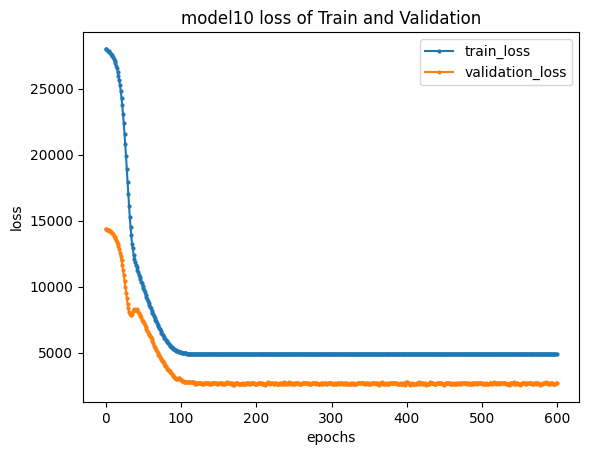

In [76]:
plt.title('model10 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist10.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist10.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()
preds = model10.predict(X_val, batch_size=128)
mse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', mse)

### 3.10. Activation Function 추가하기

지난 시간에 수행한 MLP와 같은 파라미터를 사용했는데도 성능이 훨씬 나쁜 것을 확인할 수 있습니다. keras가 sklearn보다 성능이 떨어지는 것이 아닙니다.

지난 강의에 사용한 sklearn MLP regressor 코드를 확인해보겠습니다.

```python
mlp_reg = MLPRegressor(hidden_layer_sizes=(300, 200, 150, 100, 50),
                       max_iter = 800,activation = 'relu',
                       solver = 'adam',verbose=True)
```

지난 강의에서 사용한 MLP regressor에는 Activation = 'relu' 가 있는데, 오늘 실습에서 사용한 keras 모델에는 activation function이 없습니다. 활성화 함수를 넣는 이유는 비선형성을 추가하기 위해서입니다.

In [77]:
from keras.layers import Activation

# model11 생성 (model 복잡도 추가)
model11 = tf.keras.Sequential()
model11.add(tf.keras.Input(shape = 3))
model11.add(Dense(300))
model11.add(Activation('relu')) # Activation function 'relu' 추가
model11.add(Dense(200))
model11.add(Activation('relu'))
model11.add(Dense(150))
model11.add(Activation('relu'))
model11.add(Dense(100))
model11.add(Activation('relu'))
model11.add(Dense(50))
model11.add(Activation('relu'))
model11.add(Dense(1))

learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 800 

model11.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 300)               1200      
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_44 (Dense)            (None, 200)               60200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dense_45 (Dense)            (None, 150)               30150     
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
 dense_46 (Dense)            (None, 100)             

In [78]:
hist11 = model11.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/800
6/6 [==============================] - 1s 49ms/step - loss: 27959.9473 - mse: 27959.9473 - mae: 111.2053 - val_loss: 14233.7666 - val_mse: 14233.7666 - val_mae: 89.0560
Epoch 2/800
6/6 [==============================] - 0s 10ms/step - loss: 27537.1113 - mse: 27537.1113 - mae: 109.3349 - val_loss: 13627.7803 - val_mse: 13627.7803 - val_mae: 85.7057
Epoch 3/800
6/6 [==============================] - 0s 10ms/step - loss: 25932.3477 - mse: 25932.3477 - mae: 102.9250 - val_loss: 11700.4834 - val_mse: 11700.4834 - val_mae: 77.0307
Epoch 4/800
6/6 [==============================] - 0s 10ms/step - loss: 22453.7227 - mse: 22453.7227 - mae: 89.5442 - val_loss: 7590.5645 - val_mse: 7590.5640 - val_mae: 60.3163
Epoch 5/800
6/6 [==============================] - 0s 10ms/step - loss: 14101.3740 - mse: 14101.3740 - mae: 74.4381 - val_loss: 4461.6909 - val_mse: 4461.6909 - val_mae: 54.4624
Epoch 6/800
6/6 [==============================] - 0s 10ms/step - loss: 9531.1455 - mse: 9531.1455 - 

Epoch 48/800
6/6 [==============================] - 0s 10ms/step - loss: 536.4425 - mse: 536.4425 - mae: 13.1934 - val_loss: 360.0894 - val_mse: 360.0894 - val_mae: 13.7629
Epoch 49/800
6/6 [==============================] - 0s 10ms/step - loss: 494.2118 - mse: 494.2118 - mae: 12.3744 - val_loss: 409.4346 - val_mse: 409.4346 - val_mae: 13.9134
Epoch 50/800
6/6 [==============================] - 0s 10ms/step - loss: 512.7672 - mse: 512.7672 - mae: 12.2763 - val_loss: 315.5456 - val_mse: 315.5456 - val_mae: 12.1259
Epoch 51/800
6/6 [==============================] - 0s 10ms/step - loss: 568.2723 - mse: 568.2723 - mae: 12.6602 - val_loss: 313.2666 - val_mse: 313.2666 - val_mae: 12.5247
Epoch 52/800
6/6 [==============================] - 0s 10ms/step - loss: 490.0710 - mse: 490.0710 - mae: 12.1406 - val_loss: 498.4371 - val_mse: 498.4371 - val_mae: 14.3721
Epoch 53/800
6/6 [==============================] - 0s 10ms/step - loss: 515.7585 - mse: 515.7585 - mae: 12.1405 - val_loss: 260.6328 -

Epoch 96/800
6/6 [==============================] - 0s 10ms/step - loss: 127.6484 - mse: 127.6484 - mae: 6.6614 - val_loss: 100.0301 - val_mse: 100.0301 - val_mae: 7.0600
Epoch 97/800
6/6 [==============================] - 0s 9ms/step - loss: 119.2462 - mse: 119.2462 - mae: 6.6986 - val_loss: 127.5473 - val_mse: 127.5473 - val_mae: 7.4790
Epoch 98/800
6/6 [==============================] - 0s 10ms/step - loss: 106.9408 - mse: 106.9408 - mae: 6.3265 - val_loss: 110.4635 - val_mse: 110.4635 - val_mae: 7.6705
Epoch 99/800
6/6 [==============================] - 0s 10ms/step - loss: 100.3835 - mse: 100.3835 - mae: 6.3650 - val_loss: 113.4994 - val_mse: 113.4994 - val_mae: 7.2084
Epoch 100/800
6/6 [==============================] - 0s 9ms/step - loss: 94.2434 - mse: 94.2434 - mae: 5.9921 - val_loss: 117.5039 - val_mse: 117.5039 - val_mae: 7.6786
Epoch 101/800
6/6 [==============================] - 0s 10ms/step - loss: 90.3900 - mse: 90.3900 - mae: 6.0237 - val_loss: 108.9397 - val_mse: 108.9

6/6 [==============================] - 0s 9ms/step - loss: 38.1503 - mse: 38.1503 - mae: 4.0481 - val_loss: 92.0142 - val_mse: 92.0142 - val_mae: 6.6054
Epoch 145/800
6/6 [==============================] - 0s 10ms/step - loss: 37.5317 - mse: 37.5317 - mae: 4.0791 - val_loss: 95.7512 - val_mse: 95.7512 - val_mae: 6.8432
Epoch 146/800
6/6 [==============================] - 0s 10ms/step - loss: 39.0191 - mse: 39.0191 - mae: 4.0125 - val_loss: 92.5343 - val_mse: 92.5343 - val_mae: 6.5150
Epoch 147/800
6/6 [==============================] - 0s 10ms/step - loss: 44.9330 - mse: 44.9330 - mae: 4.5838 - val_loss: 98.0851 - val_mse: 98.0851 - val_mae: 7.5343
Epoch 148/800
6/6 [==============================] - 0s 10ms/step - loss: 43.9990 - mse: 43.9990 - mae: 4.4368 - val_loss: 109.8799 - val_mse: 109.8799 - val_mae: 6.6202
Epoch 149/800
6/6 [==============================] - 0s 10ms/step - loss: 40.0679 - mse: 40.0679 - mae: 4.3036 - val_loss: 95.2458 - val_mse: 95.2458 - val_mae: 7.3771
Epoch

Epoch 193/800
6/6 [==============================] - 0s 9ms/step - loss: 37.5311 - mse: 37.5311 - mae: 4.0549 - val_loss: 96.7318 - val_mse: 96.7318 - val_mae: 7.3300
Epoch 194/800
6/6 [==============================] - 0s 9ms/step - loss: 34.5593 - mse: 34.5593 - mae: 4.0095 - val_loss: 94.8611 - val_mse: 94.8611 - val_mae: 6.4191
Epoch 195/800
6/6 [==============================] - 0s 9ms/step - loss: 28.2441 - mse: 28.2441 - mae: 3.6187 - val_loss: 92.1214 - val_mse: 92.1214 - val_mae: 7.1753
Epoch 196/800
6/6 [==============================] - 0s 9ms/step - loss: 37.6228 - mse: 37.6228 - mae: 3.7522 - val_loss: 92.6359 - val_mse: 92.6359 - val_mae: 7.1908
Epoch 197/800
6/6 [==============================] - 0s 9ms/step - loss: 32.1115 - mse: 32.1115 - mae: 3.7186 - val_loss: 99.0609 - val_mse: 99.0609 - val_mae: 6.5454
Epoch 198/800
6/6 [==============================] - 0s 9ms/step - loss: 24.3778 - mse: 24.3778 - mae: 3.4249 - val_loss: 90.9549 - val_mse: 90.9549 - val_mae: 7.034

Epoch 242/800
6/6 [==============================] - 0s 9ms/step - loss: 18.4521 - mse: 18.4521 - mae: 2.8840 - val_loss: 98.1236 - val_mse: 98.1236 - val_mae: 6.4172
Epoch 243/800
6/6 [==============================] - 0s 10ms/step - loss: 21.9050 - mse: 21.9050 - mae: 3.2280 - val_loss: 92.5640 - val_mse: 92.5640 - val_mae: 6.8689
Epoch 244/800
6/6 [==============================] - 0s 9ms/step - loss: 28.9393 - mse: 28.9393 - mae: 3.4065 - val_loss: 95.2495 - val_mse: 95.2495 - val_mae: 7.3012
Epoch 245/800
6/6 [==============================] - 0s 9ms/step - loss: 32.8329 - mse: 32.8329 - mae: 4.1156 - val_loss: 138.4726 - val_mse: 138.4726 - val_mae: 7.6412
Epoch 246/800
6/6 [==============================] - 0s 9ms/step - loss: 41.5561 - mse: 41.5561 - mae: 4.7304 - val_loss: 96.7640 - val_mse: 96.7640 - val_mae: 7.3788
Epoch 247/800
6/6 [==============================] - 0s 9ms/step - loss: 50.4692 - mse: 50.4692 - mae: 4.2857 - val_loss: 113.7467 - val_mse: 113.7467 - val_mae: 

6/6 [==============================] - 0s 9ms/step - loss: 11.5316 - mse: 11.5316 - mae: 2.2151 - val_loss: 92.7973 - val_mse: 92.7973 - val_mae: 6.2751
Epoch 291/800
6/6 [==============================] - 0s 9ms/step - loss: 13.1236 - mse: 13.1236 - mae: 2.2726 - val_loss: 87.5930 - val_mse: 87.5930 - val_mae: 6.3963
Epoch 292/800
6/6 [==============================] - 0s 10ms/step - loss: 11.2595 - mse: 11.2595 - mae: 2.2105 - val_loss: 91.7073 - val_mse: 91.7073 - val_mae: 6.6427
Epoch 293/800
6/6 [==============================] - 0s 10ms/step - loss: 10.7242 - mse: 10.7242 - mae: 2.1563 - val_loss: 89.7799 - val_mse: 89.7799 - val_mae: 6.4598
Epoch 294/800
6/6 [==============================] - 0s 10ms/step - loss: 10.6313 - mse: 10.6313 - mae: 2.1212 - val_loss: 88.5560 - val_mse: 88.5560 - val_mae: 6.4835
Epoch 295/800
6/6 [==============================] - 0s 10ms/step - loss: 10.8813 - mse: 10.8813 - mae: 2.1250 - val_loss: 90.1075 - val_mse: 90.1075 - val_mae: 6.6766
Epoch 29

6/6 [==============================] - 0s 9ms/step - loss: 29.6696 - mse: 29.6696 - mae: 3.7949 - val_loss: 85.0352 - val_mse: 85.0352 - val_mae: 6.4061
Epoch 340/800
6/6 [==============================] - 0s 9ms/step - loss: 20.7560 - mse: 20.7560 - mae: 3.2333 - val_loss: 96.5152 - val_mse: 96.5152 - val_mae: 7.1376
Epoch 341/800
6/6 [==============================] - 0s 9ms/step - loss: 23.2515 - mse: 23.2515 - mae: 3.1234 - val_loss: 92.3218 - val_mse: 92.3218 - val_mae: 6.5381
Epoch 342/800
6/6 [==============================] - 0s 10ms/step - loss: 17.7270 - mse: 17.7270 - mae: 2.7291 - val_loss: 94.8746 - val_mse: 94.8746 - val_mae: 6.2923
Epoch 343/800
6/6 [==============================] - 0s 9ms/step - loss: 11.3365 - mse: 11.3365 - mae: 2.2666 - val_loss: 91.3877 - val_mse: 91.3877 - val_mae: 6.2748
Epoch 344/800
6/6 [==============================] - 0s 9ms/step - loss: 10.4678 - mse: 10.4678 - mae: 2.2261 - val_loss: 96.9266 - val_mse: 96.9266 - val_mae: 6.7463
Epoch 345/8

6/6 [==============================] - 0s 8ms/step - loss: 11.6705 - mse: 11.6705 - mae: 2.3872 - val_loss: 89.1053 - val_mse: 89.1053 - val_mae: 6.4298
Epoch 389/800
6/6 [==============================] - 0s 8ms/step - loss: 13.7899 - mse: 13.7899 - mae: 2.5262 - val_loss: 95.4198 - val_mse: 95.4198 - val_mae: 7.1333
Epoch 390/800
6/6 [==============================] - 0s 8ms/step - loss: 13.7887 - mse: 13.7887 - mae: 2.6816 - val_loss: 96.5259 - val_mse: 96.5259 - val_mae: 6.1681
Epoch 391/800
6/6 [==============================] - 0s 7ms/step - loss: 14.1699 - mse: 14.1699 - mae: 2.4263 - val_loss: 94.4543 - val_mse: 94.4543 - val_mae: 6.1077
Epoch 392/800
6/6 [==============================] - 0s 8ms/step - loss: 32.9817 - mse: 32.9817 - mae: 3.4261 - val_loss: 93.9086 - val_mse: 93.9086 - val_mae: 6.7544
Epoch 393/800
6/6 [==============================] - 0s 8ms/step - loss: 30.2813 - mse: 30.2813 - mae: 3.2944 - val_loss: 106.6364 - val_mse: 106.6364 - val_mae: 7.8183
Epoch 394/

6/6 [==============================] - 0s 7ms/step - loss: 47.8283 - mse: 47.8283 - mae: 4.2533 - val_loss: 89.3987 - val_mse: 89.3987 - val_mae: 6.5197
Epoch 438/800
6/6 [==============================] - 0s 8ms/step - loss: 41.0128 - mse: 41.0128 - mae: 4.5637 - val_loss: 102.6156 - val_mse: 102.6156 - val_mae: 7.5411
Epoch 439/800
6/6 [==============================] - 0s 8ms/step - loss: 31.0716 - mse: 31.0716 - mae: 3.8424 - val_loss: 133.9883 - val_mse: 133.9883 - val_mae: 7.1742
Epoch 440/800
6/6 [==============================] - 0s 8ms/step - loss: 34.1721 - mse: 34.1721 - mae: 4.1541 - val_loss: 86.0020 - val_mse: 86.0020 - val_mae: 6.6840
Epoch 441/800
6/6 [==============================] - 0s 8ms/step - loss: 18.3417 - mse: 18.3417 - mae: 3.1597 - val_loss: 85.3093 - val_mse: 85.3093 - val_mae: 6.1105
Epoch 442/800
6/6 [==============================] - 0s 8ms/step - loss: 13.1502 - mse: 13.1502 - mae: 2.7086 - val_loss: 92.7976 - val_mse: 92.7976 - val_mae: 6.3599
Epoch 44

6/6 [==============================] - 0s 8ms/step - loss: 3.7796 - mse: 3.7796 - mae: 1.2798 - val_loss: 85.9314 - val_mse: 85.9314 - val_mae: 6.0080
Epoch 487/800
6/6 [==============================] - 0s 9ms/step - loss: 3.5892 - mse: 3.5892 - mae: 1.1903 - val_loss: 89.7867 - val_mse: 89.7867 - val_mae: 6.2635
Epoch 488/800
6/6 [==============================] - 0s 10ms/step - loss: 3.5905 - mse: 3.5905 - mae: 1.2406 - val_loss: 86.7307 - val_mse: 86.7307 - val_mae: 5.9912
Epoch 489/800
6/6 [==============================] - 0s 9ms/step - loss: 3.6856 - mse: 3.6856 - mae: 1.2322 - val_loss: 89.3872 - val_mse: 89.3872 - val_mae: 6.1391
Epoch 490/800
6/6 [==============================] - 0s 10ms/step - loss: 3.2980 - mse: 3.2980 - mae: 1.1266 - val_loss: 86.5349 - val_mse: 86.5349 - val_mae: 6.1231
Epoch 491/800
6/6 [==============================] - 0s 10ms/step - loss: 3.7181 - mse: 3.7181 - mae: 1.1973 - val_loss: 87.3306 - val_mse: 87.3306 - val_mae: 6.1215
Epoch 492/800
6/6 [==

Epoch 536/800
6/6 [==============================] - 0s 9ms/step - loss: 4.7308 - mse: 4.7308 - mae: 1.3686 - val_loss: 87.8145 - val_mse: 87.8145 - val_mae: 6.1127
Epoch 537/800
6/6 [==============================] - 0s 9ms/step - loss: 3.6672 - mse: 3.6672 - mae: 1.3660 - val_loss: 94.0031 - val_mse: 94.0031 - val_mae: 6.1914
Epoch 538/800
6/6 [==============================] - 0s 9ms/step - loss: 4.1605 - mse: 4.1605 - mae: 1.4448 - val_loss: 91.2608 - val_mse: 91.2608 - val_mae: 6.0858
Epoch 539/800
6/6 [==============================] - 0s 9ms/step - loss: 6.3649 - mse: 6.3649 - mae: 1.5739 - val_loss: 87.7738 - val_mse: 87.7738 - val_mae: 6.2760
Epoch 540/800
6/6 [==============================] - 0s 9ms/step - loss: 4.7904 - mse: 4.7905 - mae: 1.4263 - val_loss: 89.7601 - val_mse: 89.7601 - val_mae: 6.3542
Epoch 541/800
6/6 [==============================] - 0s 9ms/step - loss: 8.7103 - mse: 8.7103 - mae: 1.7196 - val_loss: 91.9319 - val_mse: 91.9319 - val_mae: 6.3751
Epoch 542/

Epoch 585/800
6/6 [==============================] - 0s 9ms/step - loss: 35.3020 - mse: 35.3020 - mae: 3.7708 - val_loss: 117.1992 - val_mse: 117.1992 - val_mae: 6.6773
Epoch 586/800
6/6 [==============================] - 0s 9ms/step - loss: 62.8155 - mse: 62.8155 - mae: 3.8112 - val_loss: 102.8440 - val_mse: 102.8440 - val_mae: 6.0739
Epoch 587/800
6/6 [==============================] - 0s 9ms/step - loss: 83.2918 - mse: 83.2918 - mae: 5.3071 - val_loss: 129.6505 - val_mse: 129.6505 - val_mae: 8.2745
Epoch 588/800
6/6 [==============================] - 0s 9ms/step - loss: 252.0512 - mse: 252.0512 - mae: 7.2876 - val_loss: 141.5292 - val_mse: 141.5292 - val_mae: 8.6127
Epoch 589/800
6/6 [==============================] - 0s 9ms/step - loss: 357.5257 - mse: 357.5257 - mae: 10.8694 - val_loss: 687.4473 - val_mse: 687.4473 - val_mae: 18.7707
Epoch 590/800
6/6 [==============================] - 0s 9ms/step - loss: 330.3275 - mse: 330.3275 - mae: 13.0335 - val_loss: 314.2996 - val_mse: 314.

Epoch 634/800
6/6 [==============================] - 0s 10ms/step - loss: 5.8768 - mse: 5.8768 - mae: 1.5866 - val_loss: 84.2627 - val_mse: 84.2627 - val_mae: 6.2900
Epoch 635/800
6/6 [==============================] - 0s 10ms/step - loss: 6.5621 - mse: 6.5621 - mae: 1.6322 - val_loss: 83.7073 - val_mse: 83.7073 - val_mae: 6.2558
Epoch 636/800
6/6 [==============================] - 0s 9ms/step - loss: 4.9248 - mse: 4.9248 - mae: 1.6037 - val_loss: 85.9478 - val_mse: 85.9478 - val_mae: 5.9808
Epoch 637/800
6/6 [==============================] - 0s 10ms/step - loss: 5.8762 - mse: 5.8762 - mae: 1.5765 - val_loss: 84.3171 - val_mse: 84.3171 - val_mae: 6.0896
Epoch 638/800
6/6 [==============================] - 0s 10ms/step - loss: 3.5502 - mse: 3.5502 - mae: 1.3135 - val_loss: 83.5147 - val_mse: 83.5147 - val_mae: 6.2661
Epoch 639/800
6/6 [==============================] - 0s 9ms/step - loss: 2.9714 - mse: 2.9714 - mae: 1.2161 - val_loss: 83.6171 - val_mse: 83.6171 - val_mae: 5.9660
Epoch 

6/6 [==============================] - 0s 10ms/step - loss: 2.7443 - mse: 2.7443 - mae: 1.0045 - val_loss: 83.7140 - val_mse: 83.7140 - val_mae: 6.1720
Epoch 684/800
6/6 [==============================] - 0s 10ms/step - loss: 2.4672 - mse: 2.4672 - mae: 1.0211 - val_loss: 86.4474 - val_mse: 86.4474 - val_mae: 6.0714
Epoch 685/800
6/6 [==============================] - 0s 10ms/step - loss: 1.9561 - mse: 1.9561 - mae: 0.9903 - val_loss: 85.1755 - val_mse: 85.1755 - val_mae: 6.0759
Epoch 686/800
6/6 [==============================] - 0s 10ms/step - loss: 2.1822 - mse: 2.1822 - mae: 1.0562 - val_loss: 83.5070 - val_mse: 83.5070 - val_mae: 6.3787
Epoch 687/800
6/6 [==============================] - 0s 10ms/step - loss: 5.4214 - mse: 5.4214 - mae: 1.6234 - val_loss: 88.6272 - val_mse: 88.6272 - val_mae: 6.0529
Epoch 688/800
6/6 [==============================] - 0s 7ms/step - loss: 3.9388 - mse: 3.9388 - mae: 1.2624 - val_loss: 89.7876 - val_mse: 89.7876 - val_mae: 6.0996
Epoch 689/800
6/6 [

6/6 [==============================] - 0s 10ms/step - loss: 0.6114 - mse: 0.6114 - mae: 0.5355 - val_loss: 85.3185 - val_mse: 85.3185 - val_mae: 6.1534
Epoch 733/800
6/6 [==============================] - 0s 10ms/step - loss: 0.5974 - mse: 0.5974 - mae: 0.5074 - val_loss: 84.9494 - val_mse: 84.9494 - val_mae: 6.1896
Epoch 734/800
6/6 [==============================] - 0s 10ms/step - loss: 0.5805 - mse: 0.5805 - mae: 0.5032 - val_loss: 85.4051 - val_mse: 85.4051 - val_mae: 6.1882
Epoch 735/800
6/6 [==============================] - 0s 9ms/step - loss: 0.5642 - mse: 0.5642 - mae: 0.4933 - val_loss: 84.9668 - val_mse: 84.9668 - val_mae: 6.1376
Epoch 736/800
6/6 [==============================] - 0s 10ms/step - loss: 0.6210 - mse: 0.6210 - mae: 0.5281 - val_loss: 85.6648 - val_mse: 85.6648 - val_mae: 6.1274
Epoch 737/800
6/6 [==============================] - 0s 10ms/step - loss: 0.5961 - mse: 0.5961 - mae: 0.5238 - val_loss: 84.7840 - val_mse: 84.7840 - val_mae: 6.1718
Epoch 738/800
6/6 [

6/6 [==============================] - 0s 10ms/step - loss: 1.0629 - mse: 1.0629 - mae: 0.7502 - val_loss: 85.6147 - val_mse: 85.6147 - val_mae: 6.3420
Epoch 782/800
6/6 [==============================] - 0s 9ms/step - loss: 1.0964 - mse: 1.0964 - mae: 0.6833 - val_loss: 84.4428 - val_mse: 84.4428 - val_mae: 6.3534
Epoch 783/800
6/6 [==============================] - 0s 10ms/step - loss: 1.7948 - mse: 1.7948 - mae: 0.9338 - val_loss: 86.4169 - val_mse: 86.4169 - val_mae: 6.2603
Epoch 784/800
6/6 [==============================] - 0s 9ms/step - loss: 0.9439 - mse: 0.9439 - mae: 0.7105 - val_loss: 88.0453 - val_mse: 88.0453 - val_mae: 6.2137
Epoch 785/800
6/6 [==============================] - 0s 9ms/step - loss: 1.2953 - mse: 1.2953 - mae: 0.7832 - val_loss: 84.8115 - val_mse: 84.8115 - val_mae: 6.2401
Epoch 786/800
6/6 [==============================] - 0s 10ms/step - loss: 2.7706 - mse: 2.7706 - mae: 1.0573 - val_loss: 83.9928 - val_mse: 83.9928 - val_mae: 6.4678
Epoch 787/800
6/6 [==

1/1 [==============================] - 0s 101ms/step
결정계수 : 0.9863394883393974
평균제곱근오차 :  9.267273699914123


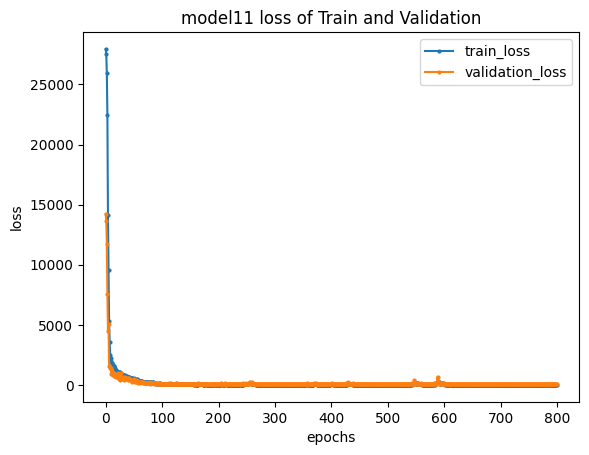

In [79]:
plt.title('model11 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist11.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist11.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()
preds = model11.predict(X_val, batch_size=128)
mse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', mse)

Activation Function을 추가하자, 완전히 다른 모델이 되었습니다. Loss가 크게 감소했고, 예측 성능 또한 크게 좋아졌습니다.
목표했던 MLP regressor와의 성능은 아직 차이가 나는데, 좀 더 엄밀한 비교를 위해서 Train/Test 데이터를 맞춰 보겠습니다.

In [80]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('InkjetDB_preprocessing.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

X = df.loc[:, 'Viscosity': 'PrintingSpeed']
y = df['PatternSize']

# test 대신 validation을 사용
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state = 1 )

X.shape
print('학습 데이터 :' ,X_train.shape)
print('테스트 데이터 : ', X_val.shape)
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train=tf.convert_to_tensor(X_train_scaled)
X_val=tf.convert_to_tensor(X_val_scaled)
Y_train = tf.convert_to_tensor(y_train)
Y_val=tf.convert_to_tensor(y_val)

학습 데이터 : (180, 3)
테스트 데이터 :  (45, 3)


In [81]:
# model12 생성 (model11과 동일하지만, 다른 데이터로 실험)
model12 = tf.keras.Sequential()
model12.add(tf.keras.Input(shape = 3))
model12.add(Dense(300))
model12.add(Activation('relu')) # 활성화 함수 추가 
model12.add(Dense(200))
model12.add(Activation('relu'))
model12.add(Dense(150))
model12.add(Activation('relu'))
model12.add(Dense(100))
model12.add(Activation('relu'))
model12.add(Dense(50))
model12.add(Activation('relu'))
model12.add(Dense(1))
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 800 

model12.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model12.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 300)               1200      
                                                                 
 activation_5 (Activation)   (None, 300)               0         
                                                                 
 dense_50 (Dense)            (None, 200)               60200     
                                                                 
 activation_6 (Activation)   (None, 200)               0         
                                                                 
 dense_51 (Dense)            (None, 150)               30150     
                                                                 
 activation_7 (Activation)   (None, 150)               0         
                                                                 
 dense_52 (Dense)            (None, 100)             

In [82]:
hist12 = model12.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Epoch 1/800
6/6 [==============================] - 1s 42ms/step - loss: 27992.7812 - mse: 27992.7773 - mae: 111.3518 - val_loss: 14283.8291 - val_mse: 14283.8291 - val_mae: 89.3494
Epoch 2/800
6/6 [==============================] - 0s 9ms/step - loss: 27785.2383 - mse: 27785.2383 - mae: 110.2829 - val_loss: 13949.0332 - val_mse: 13949.0332 - val_mae: 87.2234
Epoch 3/800
6/6 [==============================] - 0s 8ms/step - loss: 27165.6367 - mse: 27165.6367 - mae: 107.0033 - val_loss: 13010.1240 - val_mse: 13010.1240 - val_mae: 81.6965
Epoch 4/800
6/6 [==============================] - 0s 8ms/step - loss: 25531.2090 - mse: 25531.2090 - mae: 98.5495 - val_loss: 10852.5977 - val_mse: 10852.5977 - val_mae: 71.9288
Epoch 5/800
6/6 [==============================] - 0s 8ms/step - loss: 22200.6875 - mse: 22200.6875 - mae: 87.3733 - val_loss: 8243.7266 - val_mse: 8243.7266 - val_mae: 65.3952
Epoch 6/800
6/6 [==============================] - 0s 8ms/step - loss: 19109.0312 - mse: 19109.0312 - m

6/6 [==============================] - 0s 8ms/step - loss: 269.6637 - mse: 269.6637 - mae: 9.8096 - val_loss: 199.9911 - val_mse: 199.9911 - val_mae: 8.3757
Epoch 49/800
6/6 [==============================] - 0s 7ms/step - loss: 252.9945 - mse: 252.9945 - mae: 9.6153 - val_loss: 162.9791 - val_mse: 162.9791 - val_mae: 7.9524
Epoch 50/800
6/6 [==============================] - 0s 8ms/step - loss: 286.4073 - mse: 286.4073 - mae: 10.2192 - val_loss: 168.4799 - val_mse: 168.4799 - val_mae: 8.2907
Epoch 51/800
6/6 [==============================] - 0s 7ms/step - loss: 264.4225 - mse: 264.4225 - mae: 9.8138 - val_loss: 180.6405 - val_mse: 180.6405 - val_mae: 8.1165
Epoch 52/800
6/6 [==============================] - 0s 7ms/step - loss: 243.7146 - mse: 243.7146 - mae: 9.4055 - val_loss: 163.0671 - val_mse: 163.0671 - val_mae: 7.7903
Epoch 53/800
6/6 [==============================] - 0s 7ms/step - loss: 260.7779 - mse: 260.7779 - mae: 9.6480 - val_loss: 171.9888 - val_mse: 171.9888 - val_mae:

6/6 [==============================] - 0s 8ms/step - loss: 157.6867 - mse: 157.6867 - mae: 7.5540 - val_loss: 101.9325 - val_mse: 101.9325 - val_mae: 6.7172
Epoch 97/800
6/6 [==============================] - 0s 8ms/step - loss: 154.0425 - mse: 154.0425 - mae: 7.5417 - val_loss: 103.1567 - val_mse: 103.1567 - val_mae: 7.2744
Epoch 98/800
6/6 [==============================] - 0s 8ms/step - loss: 146.0680 - mse: 146.0680 - mae: 7.5925 - val_loss: 113.2643 - val_mse: 113.2643 - val_mae: 7.2825
Epoch 99/800
6/6 [==============================] - 0s 8ms/step - loss: 146.4667 - mse: 146.4667 - mae: 7.8263 - val_loss: 96.5982 - val_mse: 96.5982 - val_mae: 6.8816
Epoch 100/800
6/6 [==============================] - 0s 8ms/step - loss: 136.9967 - mse: 136.9967 - mae: 7.3355 - val_loss: 104.7413 - val_mse: 104.7413 - val_mae: 6.6439
Epoch 101/800
6/6 [==============================] - 0s 8ms/step - loss: 138.2810 - mse: 138.2810 - mae: 7.4227 - val_loss: 96.9415 - val_mse: 96.9415 - val_mae: 6.

6/6 [==============================] - 0s 8ms/step - loss: 123.3933 - mse: 123.3933 - mae: 6.9439 - val_loss: 86.9275 - val_mse: 86.9275 - val_mae: 6.4291
Epoch 145/800
6/6 [==============================] - 0s 7ms/step - loss: 119.9390 - mse: 119.9390 - mae: 6.9620 - val_loss: 95.6042 - val_mse: 95.6042 - val_mae: 6.3008
Epoch 146/800
6/6 [==============================] - 0s 8ms/step - loss: 123.4298 - mse: 123.4298 - mae: 7.0984 - val_loss: 92.3193 - val_mse: 92.3193 - val_mae: 6.9160
Epoch 147/800
6/6 [==============================] - 0s 8ms/step - loss: 104.7219 - mse: 104.7219 - mae: 6.5441 - val_loss: 85.9361 - val_mse: 85.9361 - val_mae: 6.2591
Epoch 148/800
6/6 [==============================] - 0s 8ms/step - loss: 105.0288 - mse: 105.0288 - mae: 6.5008 - val_loss: 88.8711 - val_mse: 88.8711 - val_mae: 6.6532
Epoch 149/800
6/6 [==============================] - 0s 8ms/step - loss: 106.6306 - mse: 106.6306 - mae: 6.4342 - val_loss: 87.4387 - val_mse: 87.4387 - val_mae: 6.2616


Epoch 193/800
6/6 [==============================] - 0s 10ms/step - loss: 98.7115 - mse: 98.7115 - mae: 6.4945 - val_loss: 101.2413 - val_mse: 101.2413 - val_mae: 7.6101
Epoch 194/800
6/6 [==============================] - 0s 9ms/step - loss: 101.1373 - mse: 101.1373 - mae: 7.0054 - val_loss: 115.9197 - val_mse: 115.9197 - val_mae: 7.7128
Epoch 195/800
6/6 [==============================] - 0s 10ms/step - loss: 107.0330 - mse: 107.0330 - mae: 6.7283 - val_loss: 91.3010 - val_mse: 91.3010 - val_mae: 7.1178
Epoch 196/800
6/6 [==============================] - 0s 10ms/step - loss: 93.2675 - mse: 93.2675 - mae: 6.1531 - val_loss: 72.8306 - val_mse: 72.8306 - val_mae: 5.9498
Epoch 197/800
6/6 [==============================] - 0s 10ms/step - loss: 90.7286 - mse: 90.7286 - mae: 5.9903 - val_loss: 88.9112 - val_mse: 88.9112 - val_mae: 6.2028
Epoch 198/800
6/6 [==============================] - 0s 10ms/step - loss: 127.9468 - mse: 127.9468 - mae: 7.5687 - val_loss: 101.7582 - val_mse: 101.7582

Epoch 242/800
6/6 [==============================] - 0s 9ms/step - loss: 60.1389 - mse: 60.1389 - mae: 5.2883 - val_loss: 99.1546 - val_mse: 99.1546 - val_mae: 7.8664
Epoch 243/800
6/6 [==============================] - 0s 9ms/step - loss: 56.4743 - mse: 56.4743 - mae: 5.0961 - val_loss: 65.5556 - val_mse: 65.5556 - val_mae: 5.6175
Epoch 244/800
6/6 [==============================] - 0s 11ms/step - loss: 56.2906 - mse: 56.2906 - mae: 5.0983 - val_loss: 63.0748 - val_mse: 63.0748 - val_mae: 5.4742
Epoch 245/800
6/6 [==============================] - 0s 9ms/step - loss: 57.1423 - mse: 57.1423 - mae: 5.0985 - val_loss: 102.5872 - val_mse: 102.5872 - val_mae: 7.8777
Epoch 246/800
6/6 [==============================] - 0s 10ms/step - loss: 75.4251 - mse: 75.4251 - mae: 6.0412 - val_loss: 76.2346 - val_mse: 76.2346 - val_mae: 5.9687
Epoch 247/800
6/6 [==============================] - 0s 10ms/step - loss: 67.2360 - mse: 67.2360 - mae: 6.0237 - val_loss: 64.4692 - val_mse: 64.4692 - val_mae: 

Epoch 291/800
6/6 [==============================] - 0s 9ms/step - loss: 40.9202 - mse: 40.9202 - mae: 4.1464 - val_loss: 58.2125 - val_mse: 58.2125 - val_mae: 5.8037
Epoch 292/800
6/6 [==============================] - 0s 10ms/step - loss: 41.3820 - mse: 41.3820 - mae: 4.5234 - val_loss: 45.0266 - val_mse: 45.0266 - val_mae: 4.8865
Epoch 293/800
6/6 [==============================] - 0s 10ms/step - loss: 32.8248 - mse: 32.8248 - mae: 3.8802 - val_loss: 60.4854 - val_mse: 60.4854 - val_mae: 5.9330
Epoch 294/800
6/6 [==============================] - 0s 9ms/step - loss: 31.5930 - mse: 31.5930 - mae: 3.7681 - val_loss: 48.2470 - val_mse: 48.2470 - val_mae: 5.2220
Epoch 295/800
6/6 [==============================] - 0s 9ms/step - loss: 32.4537 - mse: 32.4537 - mae: 3.6308 - val_loss: 46.1771 - val_mse: 46.1771 - val_mae: 5.0677
Epoch 296/800
6/6 [==============================] - 0s 8ms/step - loss: 34.2874 - mse: 34.2874 - mae: 3.7176 - val_loss: 44.7599 - val_mse: 44.7599 - val_mae: 4.9

Epoch 340/800
6/6 [==============================] - 0s 9ms/step - loss: 46.5900 - mse: 46.5900 - mae: 4.8817 - val_loss: 118.3870 - val_mse: 118.3870 - val_mae: 8.7010
Epoch 341/800
6/6 [==============================] - 0s 10ms/step - loss: 55.4055 - mse: 55.4055 - mae: 6.0206 - val_loss: 59.5317 - val_mse: 59.5317 - val_mae: 5.9446
Epoch 342/800
6/6 [==============================] - 0s 9ms/step - loss: 64.4956 - mse: 64.4956 - mae: 5.4924 - val_loss: 36.1552 - val_mse: 36.1552 - val_mae: 4.4240
Epoch 343/800
6/6 [==============================] - 0s 9ms/step - loss: 66.9537 - mse: 66.9537 - mae: 5.4577 - val_loss: 127.7599 - val_mse: 127.7599 - val_mae: 8.2508
Epoch 344/800
6/6 [==============================] - 0s 10ms/step - loss: 44.9433 - mse: 44.9433 - mae: 4.9424 - val_loss: 49.9221 - val_mse: 49.9221 - val_mae: 5.3737
Epoch 345/800
6/6 [==============================] - 0s 10ms/step - loss: 43.1948 - mse: 43.1948 - mae: 4.5329 - val_loss: 38.7848 - val_mse: 38.7848 - val_mae

Epoch 389/800
6/6 [==============================] - 0s 9ms/step - loss: 17.3933 - mse: 17.3933 - mae: 2.8629 - val_loss: 49.5973 - val_mse: 49.5973 - val_mae: 5.2031
Epoch 390/800
6/6 [==============================] - 0s 10ms/step - loss: 19.4448 - mse: 19.4448 - mae: 3.1084 - val_loss: 37.5461 - val_mse: 37.5461 - val_mae: 4.6527
Epoch 391/800
6/6 [==============================] - 0s 9ms/step - loss: 16.9958 - mse: 16.9958 - mae: 2.8141 - val_loss: 41.0497 - val_mse: 41.0497 - val_mae: 4.7880
Epoch 392/800
6/6 [==============================] - 0s 9ms/step - loss: 17.4914 - mse: 17.4914 - mae: 2.8582 - val_loss: 63.8404 - val_mse: 63.8404 - val_mae: 5.8261
Epoch 393/800
6/6 [==============================] - 0s 9ms/step - loss: 22.3694 - mse: 22.3694 - mae: 3.3566 - val_loss: 60.5516 - val_mse: 60.5516 - val_mae: 5.7438
Epoch 394/800
6/6 [==============================] - 0s 9ms/step - loss: 22.9651 - mse: 22.9651 - mae: 3.7077 - val_loss: 37.4553 - val_mse: 37.4553 - val_mae: 4.60

Epoch 438/800
6/6 [==============================] - 0s 10ms/step - loss: 13.4812 - mse: 13.4812 - mae: 2.5484 - val_loss: 32.3734 - val_mse: 32.3734 - val_mae: 4.1315
Epoch 439/800
6/6 [==============================] - 0s 10ms/step - loss: 16.3955 - mse: 16.3955 - mae: 2.8332 - val_loss: 46.0984 - val_mse: 46.0984 - val_mae: 5.0271
Epoch 440/800
6/6 [==============================] - 0s 10ms/step - loss: 13.9255 - mse: 13.9255 - mae: 2.6459 - val_loss: 39.7098 - val_mse: 39.7098 - val_mae: 4.6113
Epoch 441/800
6/6 [==============================] - 0s 10ms/step - loss: 11.5469 - mse: 11.5469 - mae: 2.3622 - val_loss: 37.5414 - val_mse: 37.5414 - val_mae: 4.4674
Epoch 442/800
6/6 [==============================] - 0s 9ms/step - loss: 11.6172 - mse: 11.6172 - mae: 2.3144 - val_loss: 39.8556 - val_mse: 39.8556 - val_mae: 4.6898
Epoch 443/800
6/6 [==============================] - 0s 9ms/step - loss: 14.3514 - mse: 14.3514 - mae: 2.5003 - val_loss: 33.6098 - val_mse: 33.6098 - val_mae: 4

Epoch 487/800
6/6 [==============================] - 0s 9ms/step - loss: 9.4944 - mse: 9.4944 - mae: 2.0967 - val_loss: 30.7188 - val_mse: 30.7188 - val_mae: 3.9258
Epoch 488/800
6/6 [==============================] - 0s 9ms/step - loss: 10.7285 - mse: 10.7285 - mae: 2.1978 - val_loss: 33.1025 - val_mse: 33.1025 - val_mae: 4.2001
Epoch 489/800
6/6 [==============================] - 0s 10ms/step - loss: 10.3774 - mse: 10.3774 - mae: 2.2882 - val_loss: 39.1700 - val_mse: 39.1700 - val_mae: 4.4712
Epoch 490/800
6/6 [==============================] - 0s 9ms/step - loss: 10.2656 - mse: 10.2656 - mae: 2.2313 - val_loss: 36.6338 - val_mse: 36.6338 - val_mae: 4.3413
Epoch 491/800
6/6 [==============================] - 0s 10ms/step - loss: 9.5331 - mse: 9.5331 - mae: 2.1666 - val_loss: 46.5622 - val_mse: 46.5622 - val_mae: 4.8819
Epoch 492/800
6/6 [==============================] - 0s 10ms/step - loss: 10.9924 - mse: 10.9924 - mae: 2.2528 - val_loss: 42.8851 - val_mse: 42.8851 - val_mae: 4.8369

6/6 [==============================] - 0s 9ms/step - loss: 10.2048 - mse: 10.2048 - mae: 2.4497 - val_loss: 35.3247 - val_mse: 35.3247 - val_mae: 4.2717
Epoch 537/800
6/6 [==============================] - 0s 9ms/step - loss: 9.0783 - mse: 9.0783 - mae: 2.2603 - val_loss: 32.0858 - val_mse: 32.0858 - val_mae: 4.1711
Epoch 538/800
6/6 [==============================] - 0s 10ms/step - loss: 9.4196 - mse: 9.4196 - mae: 2.3281 - val_loss: 37.8162 - val_mse: 37.8162 - val_mae: 4.5274
Epoch 539/800
6/6 [==============================] - 0s 10ms/step - loss: 9.8520 - mse: 9.8520 - mae: 2.3012 - val_loss: 51.4774 - val_mse: 51.4774 - val_mae: 5.1472
Epoch 540/800
6/6 [==============================] - 0s 9ms/step - loss: 12.0156 - mse: 12.0156 - mae: 2.4320 - val_loss: 46.5286 - val_mse: 46.5286 - val_mae: 5.0619
Epoch 541/800
6/6 [==============================] - 0s 8ms/step - loss: 8.3637 - mse: 8.3637 - mae: 2.1166 - val_loss: 37.4589 - val_mse: 37.4589 - val_mae: 4.3337
Epoch 542/800
6/6 

6/6 [==============================] - 0s 10ms/step - loss: 7.9468 - mse: 7.9468 - mae: 2.0103 - val_loss: 34.0560 - val_mse: 34.0560 - val_mae: 4.0774
Epoch 586/800
6/6 [==============================] - 0s 9ms/step - loss: 6.8239 - mse: 6.8239 - mae: 1.8611 - val_loss: 31.4433 - val_mse: 31.4433 - val_mae: 4.0321
Epoch 587/800
6/6 [==============================] - 0s 8ms/step - loss: 10.8037 - mse: 10.8037 - mae: 2.3504 - val_loss: 26.5135 - val_mse: 26.5135 - val_mae: 3.6487
Epoch 588/800
6/6 [==============================] - 0s 8ms/step - loss: 26.9817 - mse: 26.9817 - mae: 3.6402 - val_loss: 32.2231 - val_mse: 32.2231 - val_mae: 4.0572
Epoch 589/800
6/6 [==============================] - 0s 8ms/step - loss: 23.0051 - mse: 23.0051 - mae: 3.0748 - val_loss: 28.5955 - val_mse: 28.5955 - val_mae: 4.0239
Epoch 590/800
6/6 [==============================] - 0s 8ms/step - loss: 21.0001 - mse: 21.0001 - mae: 3.4112 - val_loss: 26.8696 - val_mse: 26.8696 - val_mae: 3.8475
Epoch 591/800
6

6/6 [==============================] - 0s 9ms/step - loss: 15.8585 - mse: 15.8585 - mae: 2.7392 - val_loss: 39.6348 - val_mse: 39.6348 - val_mae: 4.5586
Epoch 635/800
6/6 [==============================] - 0s 10ms/step - loss: 10.1952 - mse: 10.1952 - mae: 2.4713 - val_loss: 33.0063 - val_mse: 33.0063 - val_mae: 3.9527
Epoch 636/800
6/6 [==============================] - 0s 10ms/step - loss: 8.4611 - mse: 8.4611 - mae: 2.1461 - val_loss: 41.9469 - val_mse: 41.9469 - val_mae: 4.6351
Epoch 637/800
6/6 [==============================] - 0s 10ms/step - loss: 7.0978 - mse: 7.0978 - mae: 2.0024 - val_loss: 30.8044 - val_mse: 30.8044 - val_mae: 3.8454
Epoch 638/800
6/6 [==============================] - 0s 10ms/step - loss: 8.8278 - mse: 8.8278 - mae: 2.1741 - val_loss: 36.9755 - val_mse: 36.9755 - val_mae: 4.3019
Epoch 639/800
6/6 [==============================] - 0s 10ms/step - loss: 7.6593 - mse: 7.6593 - mae: 2.0244 - val_loss: 28.8464 - val_mse: 28.8464 - val_mae: 3.7786
Epoch 640/800
6

6/6 [==============================] - 0s 10ms/step - loss: 4.9021 - mse: 4.9021 - mae: 1.5806 - val_loss: 33.6552 - val_mse: 33.6552 - val_mae: 4.0360
Epoch 684/800
6/6 [==============================] - 0s 10ms/step - loss: 5.2420 - mse: 5.2420 - mae: 1.6768 - val_loss: 42.8144 - val_mse: 42.8144 - val_mae: 4.6916
Epoch 685/800
6/6 [==============================] - 0s 10ms/step - loss: 6.9305 - mse: 6.9305 - mae: 1.9808 - val_loss: 39.9460 - val_mse: 39.9460 - val_mae: 4.5011
Epoch 686/800
6/6 [==============================] - 0s 10ms/step - loss: 7.8094 - mse: 7.8094 - mae: 1.8855 - val_loss: 45.4823 - val_mse: 45.4823 - val_mae: 4.7167
Epoch 687/800
6/6 [==============================] - 0s 10ms/step - loss: 22.4716 - mse: 22.4716 - mae: 3.2747 - val_loss: 79.1068 - val_mse: 79.1068 - val_mae: 6.5481
Epoch 688/800
6/6 [==============================] - 0s 10ms/step - loss: 17.0364 - mse: 17.0364 - mae: 3.1462 - val_loss: 75.8867 - val_mse: 75.8867 - val_mae: 6.2469
Epoch 689/800


6/6 [==============================] - 0s 9ms/step - loss: 7.6600 - mse: 7.6600 - mae: 1.9253 - val_loss: 31.3723 - val_mse: 31.3723 - val_mae: 3.9204
Epoch 733/800
6/6 [==============================] - 0s 10ms/step - loss: 8.6011 - mse: 8.6011 - mae: 2.1226 - val_loss: 43.9572 - val_mse: 43.9572 - val_mae: 4.5789
Epoch 734/800
6/6 [==============================] - 0s 10ms/step - loss: 12.8599 - mse: 12.8599 - mae: 2.7557 - val_loss: 62.9706 - val_mse: 62.9706 - val_mae: 6.0083
Epoch 735/800
6/6 [==============================] - 0s 10ms/step - loss: 14.3458 - mse: 14.3458 - mae: 2.7726 - val_loss: 48.4021 - val_mse: 48.4021 - val_mae: 4.8885
Epoch 736/800
6/6 [==============================] - 0s 10ms/step - loss: 11.9086 - mse: 11.9086 - mae: 2.5526 - val_loss: 28.4780 - val_mse: 28.4780 - val_mae: 3.7992
Epoch 737/800
6/6 [==============================] - 0s 8ms/step - loss: 14.2333 - mse: 14.2333 - mae: 2.8800 - val_loss: 25.4592 - val_mse: 25.4592 - val_mae: 3.5726
Epoch 738/80

6/6 [==============================] - 0s 11ms/step - loss: 5.2564 - mse: 5.2564 - mae: 1.7141 - val_loss: 26.0064 - val_mse: 26.0064 - val_mae: 3.6357
Epoch 782/800
6/6 [==============================] - 0s 10ms/step - loss: 6.1147 - mse: 6.1147 - mae: 1.8509 - val_loss: 24.8586 - val_mse: 24.8586 - val_mae: 3.5021
Epoch 783/800
6/6 [==============================] - 0s 10ms/step - loss: 5.6074 - mse: 5.6074 - mae: 1.7031 - val_loss: 26.9321 - val_mse: 26.9321 - val_mae: 3.6788
Epoch 784/800
6/6 [==============================] - 0s 10ms/step - loss: 4.8595 - mse: 4.8595 - mae: 1.6422 - val_loss: 27.8112 - val_mse: 27.8112 - val_mae: 3.6426
Epoch 785/800
6/6 [==============================] - 0s 10ms/step - loss: 4.3031 - mse: 4.3031 - mae: 1.6040 - val_loss: 30.4586 - val_mse: 30.4586 - val_mae: 3.7648
Epoch 786/800
6/6 [==============================] - 0s 10ms/step - loss: 4.2218 - mse: 4.2218 - mae: 1.5059 - val_loss: 30.6564 - val_mse: 30.6564 - val_mae: 3.8739
Epoch 787/800
6/6 

1/1 [==============================] - 0s 100ms/step
결정계수 : 0.9945787675788964
평균제곱근오차 :  5.838046098634878


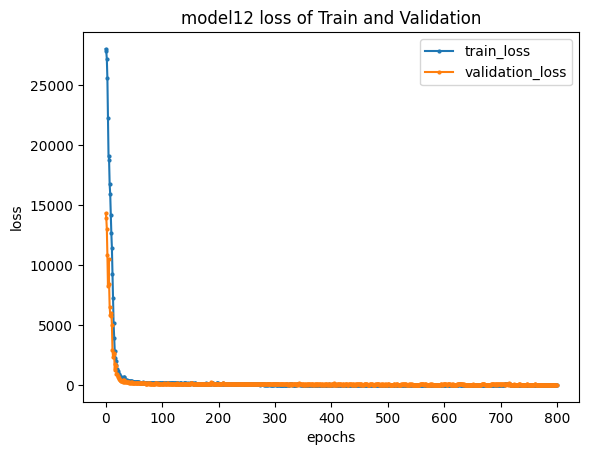

In [84]:
plt.title('model12 loss of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist12.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist12.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()
preds = model12.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

## 4. 연습문제

---

### 1. 위의 코드들을 활용하고 파라미터들을 조정해서, 데이터에 가장 잘 적합하는 모델을 만들어 보세요. 아래에 주어진 코드를 수정 및 추가하며 진행해 보세요.

In [85]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape = 3))
model.add(Dense(20))
model.add(Dense(10))
model.add(Dense(1))

learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = MeanSquaredError()
epochs = 800

model.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])
model.summary()

hist = model.fit(X_train, Y_train, batch_size=30, epochs=epochs, validation_data =(X_val, Y_val))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 20)                80        
                                                                 
 dense_56 (Dense)            (None, 10)                210       
                                                                 
 dense_57 (Dense)            (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/800
6/6 [==============================] - 1s 134ms/step - loss: 28063.1777 - mse: 28063.1777 - mae: 111.8301 - val_loss: 14412.7471 - val_mse: 14412.7471 - val_mae: 90.2351
Epoch 2/800
6/6 [==============================] - 0s 8ms/step - loss: 28033.3301 - mse: 28033.3301 - mae: 111.6740 - val_loss: 14385.098

Epoch 42/800
6/6 [==============================] - 0s 8ms/step - loss: 20928.9102 - mse: 20928.9102 - mae: 84.2218 - val_loss: 8553.6221 - val_mse: 8553.6221 - val_mae: 63.3588
Epoch 43/800
6/6 [==============================] - 0s 8ms/step - loss: 20656.4863 - mse: 20656.4863 - mae: 83.7620 - val_loss: 8402.4824 - val_mse: 8402.4824 - val_mae: 63.1904
Epoch 44/800
6/6 [==============================] - 0s 9ms/step - loss: 20434.6172 - mse: 20434.6172 - mae: 83.4049 - val_loss: 8260.1855 - val_mse: 8260.1855 - val_mae: 63.0261
Epoch 45/800
6/6 [==============================] - 0s 8ms/step - loss: 20179.3086 - mse: 20179.3086 - mae: 83.0704 - val_loss: 8140.3062 - val_mse: 8140.3062 - val_mae: 62.8565
Epoch 46/800
6/6 [==============================] - 0s 8ms/step - loss: 19973.4688 - mse: 19973.4688 - mae: 83.0150 - val_loss: 8031.8770 - val_mse: 8031.8770 - val_mae: 62.7846
Epoch 47/800
6/6 [==============================] - 0s 8ms/step - loss: 19760.3496 - mse: 19760.3496 - mae: 82

6/6 [==============================] - 0s 8ms/step - loss: 14581.1709 - mse: 14581.1709 - mae: 76.8108 - val_loss: 5786.4971 - val_mse: 5786.4971 - val_mae: 59.0665
Epoch 89/800
6/6 [==============================] - 0s 8ms/step - loss: 14465.1709 - mse: 14465.1709 - mae: 76.6000 - val_loss: 5738.5361 - val_mse: 5738.5361 - val_mae: 58.9548
Epoch 90/800
6/6 [==============================] - 0s 8ms/step - loss: 14328.9375 - mse: 14328.9375 - mae: 76.3455 - val_loss: 5676.7168 - val_mse: 5676.7168 - val_mae: 58.6827
Epoch 91/800
6/6 [==============================] - 0s 8ms/step - loss: 14205.4336 - mse: 14205.4336 - mae: 76.0281 - val_loss: 5614.1650 - val_mse: 5614.1650 - val_mae: 58.3966
Epoch 92/800
6/6 [==============================] - 0s 9ms/step - loss: 14100.7490 - mse: 14100.7490 - mae: 75.7630 - val_loss: 5558.8325 - val_mse: 5558.8325 - val_mae: 58.1965
Epoch 93/800
6/6 [==============================] - 0s 8ms/step - loss: 13964.2363 - mse: 13964.2363 - mae: 75.4636 - val_l

6/6 [==============================] - 0s 8ms/step - loss: 8795.1807 - mse: 8795.1807 - mae: 57.9570 - val_loss: 3056.2229 - val_mse: 3056.2229 - val_mae: 45.0236
Epoch 135/800
6/6 [==============================] - 0s 8ms/step - loss: 8688.7197 - mse: 8688.7197 - mae: 57.4382 - val_loss: 2998.1084 - val_mse: 2998.1084 - val_mae: 44.5509
Epoch 136/800
6/6 [==============================] - 0s 9ms/step - loss: 8573.8398 - mse: 8573.8398 - mae: 56.9239 - val_loss: 2953.3555 - val_mse: 2953.3555 - val_mae: 44.2950
Epoch 137/800
6/6 [==============================] - 0s 8ms/step - loss: 8457.7607 - mse: 8457.7607 - mae: 56.4512 - val_loss: 2910.2849 - val_mse: 2910.2849 - val_mae: 44.0287
Epoch 138/800
6/6 [==============================] - 0s 9ms/step - loss: 8355.9004 - mse: 8355.9004 - mae: 56.1495 - val_loss: 2883.6177 - val_mse: 2883.6177 - val_mae: 43.9513
Epoch 139/800
6/6 [==============================] - 0s 9ms/step - loss: 8238.0107 - mse: 8238.0107 - mae: 55.7533 - val_loss: 28

6/6 [==============================] - 0s 7ms/step - loss: 5682.6040 - mse: 5682.6040 - mae: 48.5249 - val_loss: 2708.4392 - val_mse: 2708.4392 - val_mae: 43.7934
Epoch 181/800
6/6 [==============================] - 0s 8ms/step - loss: 5666.6045 - mse: 5666.6045 - mae: 48.5207 - val_loss: 2733.5779 - val_mse: 2733.5779 - val_mae: 43.9539
Epoch 182/800
6/6 [==============================] - 0s 7ms/step - loss: 5639.4316 - mse: 5639.4316 - mae: 48.5461 - val_loss: 2747.3867 - val_mse: 2747.3867 - val_mae: 44.0008
Epoch 183/800
6/6 [==============================] - 0s 8ms/step - loss: 5620.5283 - mse: 5620.5283 - mae: 48.5144 - val_loss: 2764.0413 - val_mse: 2764.0413 - val_mae: 44.0614
Epoch 184/800
6/6 [==============================] - 0s 8ms/step - loss: 5599.9912 - mse: 5599.9912 - mae: 48.4637 - val_loss: 2767.5759 - val_mse: 2767.5759 - val_mae: 43.9953
Epoch 185/800
6/6 [==============================] - 0s 8ms/step - loss: 5585.6270 - mse: 5585.6270 - mae: 48.4781 - val_loss: 27

6/6 [==============================] - 0s 8ms/step - loss: 5201.0908 - mse: 5201.0908 - mae: 48.3275 - val_loss: 3041.4431 - val_mse: 3041.4431 - val_mae: 45.3329
Epoch 227/800
6/6 [==============================] - 0s 8ms/step - loss: 5196.2749 - mse: 5196.2749 - mae: 48.2958 - val_loss: 3040.8264 - val_mse: 3040.8264 - val_mae: 45.3283
Epoch 228/800
6/6 [==============================] - 0s 9ms/step - loss: 5201.3228 - mse: 5201.3228 - mae: 48.4517 - val_loss: 3078.5916 - val_mse: 3078.5916 - val_mae: 45.7838
Epoch 229/800
6/6 [==============================] - 0s 8ms/step - loss: 5186.4634 - mse: 5186.4634 - mae: 48.5297 - val_loss: 3077.1584 - val_mse: 3077.1584 - val_mae: 45.7815
Epoch 230/800
6/6 [==============================] - 0s 8ms/step - loss: 5181.5762 - mse: 5181.5762 - mae: 48.4779 - val_loss: 3067.9131 - val_mse: 3067.9131 - val_mae: 45.6551
Epoch 231/800
6/6 [==============================] - 0s 8ms/step - loss: 5176.1626 - mse: 5176.1626 - mae: 48.4192 - val_loss: 30

6/6 [==============================] - 0s 9ms/step - loss: 5045.1475 - mse: 5045.1475 - mae: 47.8926 - val_loss: 2941.9448 - val_mse: 2941.9448 - val_mae: 45.4070
Epoch 273/800
6/6 [==============================] - 0s 8ms/step - loss: 5037.7124 - mse: 5037.7124 - mae: 47.7546 - val_loss: 2933.5188 - val_mse: 2933.5188 - val_mae: 45.3623
Epoch 274/800
6/6 [==============================] - 0s 8ms/step - loss: 5035.5020 - mse: 5035.5020 - mae: 47.8218 - val_loss: 2945.3420 - val_mse: 2945.3420 - val_mae: 45.5115
Epoch 275/800
6/6 [==============================] - 0s 9ms/step - loss: 5032.3140 - mse: 5032.3140 - mae: 47.8615 - val_loss: 2954.5693 - val_mse: 2954.5693 - val_mae: 45.6081
Epoch 276/800
6/6 [==============================] - 0s 9ms/step - loss: 5028.8091 - mse: 5028.8091 - mae: 47.9092 - val_loss: 2960.0454 - val_mse: 2960.0454 - val_mae: 45.6763
Epoch 277/800
6/6 [==============================] - 0s 8ms/step - loss: 5029.5361 - mse: 5029.5361 - mae: 47.8837 - val_loss: 29

6/6 [==============================] - 0s 8ms/step - loss: 4958.5400 - mse: 4958.5400 - mae: 47.4244 - val_loss: 2847.2280 - val_mse: 2847.2280 - val_mae: 45.4956
Epoch 319/800
6/6 [==============================] - 0s 8ms/step - loss: 4966.2974 - mse: 4966.2974 - mae: 47.3917 - val_loss: 2821.6497 - val_mse: 2821.6497 - val_mae: 45.2605
Epoch 320/800
6/6 [==============================] - 0s 8ms/step - loss: 4960.4419 - mse: 4960.4419 - mae: 47.4044 - val_loss: 2850.8538 - val_mse: 2850.8538 - val_mae: 45.5784
Epoch 321/800
6/6 [==============================] - 0s 9ms/step - loss: 4958.1533 - mse: 4958.1533 - mae: 47.5123 - val_loss: 2860.0627 - val_mse: 2860.0627 - val_mae: 45.6538
Epoch 322/800
6/6 [==============================] - 0s 9ms/step - loss: 4954.5166 - mse: 4954.5166 - mae: 47.5366 - val_loss: 2860.9036 - val_mse: 2860.9036 - val_mae: 45.6988
Epoch 323/800
6/6 [==============================] - 0s 9ms/step - loss: 4952.8076 - mse: 4952.8081 - mae: 47.5751 - val_loss: 28

6/6 [==============================] - 0s 10ms/step - loss: 4921.5938 - mse: 4921.5938 - mae: 47.3921 - val_loss: 2783.5515 - val_mse: 2783.5515 - val_mae: 45.4756
Epoch 365/800
6/6 [==============================] - 0s 9ms/step - loss: 4924.0659 - mse: 4924.0659 - mae: 47.4511 - val_loss: 2799.8391 - val_mse: 2799.8391 - val_mae: 45.6411
Epoch 366/800
6/6 [==============================] - 0s 8ms/step - loss: 4921.6411 - mse: 4921.6411 - mae: 47.4222 - val_loss: 2792.9895 - val_mse: 2792.9895 - val_mae: 45.5945
Epoch 367/800
6/6 [==============================] - 0s 8ms/step - loss: 4925.2275 - mse: 4925.2275 - mae: 47.5066 - val_loss: 2803.6428 - val_mse: 2803.6428 - val_mae: 45.6871
Epoch 368/800
6/6 [==============================] - 0s 8ms/step - loss: 4919.1704 - mse: 4919.1704 - mae: 47.4041 - val_loss: 2784.0115 - val_mse: 2784.0115 - val_mae: 45.5106
Epoch 369/800
6/6 [==============================] - 0s 8ms/step - loss: 4921.9375 - mse: 4921.9375 - mae: 47.3293 - val_loss: 2

6/6 [==============================] - 0s 9ms/step - loss: 4903.4609 - mse: 4903.4609 - mae: 47.4100 - val_loss: 2751.7756 - val_mse: 2751.7756 - val_mae: 45.5438
Epoch 411/800
6/6 [==============================] - 0s 9ms/step - loss: 4902.5645 - mse: 4902.5645 - mae: 47.4242 - val_loss: 2746.1392 - val_mse: 2746.1392 - val_mae: 45.4953
Epoch 412/800
6/6 [==============================] - 0s 8ms/step - loss: 4901.8960 - mse: 4901.8960 - mae: 47.3753 - val_loss: 2738.1943 - val_mse: 2738.1943 - val_mae: 45.4165
Epoch 413/800
6/6 [==============================] - 0s 9ms/step - loss: 4905.3457 - mse: 4905.3457 - mae: 47.3817 - val_loss: 2736.3621 - val_mse: 2736.3621 - val_mae: 45.3610
Epoch 414/800
6/6 [==============================] - 0s 9ms/step - loss: 4906.9985 - mse: 4906.9985 - mae: 47.3193 - val_loss: 2728.1736 - val_mse: 2728.1736 - val_mae: 45.2346
Epoch 415/800
6/6 [==============================] - 0s 9ms/step - loss: 4902.2354 - mse: 4902.2354 - mae: 47.2304 - val_loss: 27

6/6 [==============================] - 0s 8ms/step - loss: 4898.0225 - mse: 4898.0225 - mae: 47.3632 - val_loss: 2697.0229 - val_mse: 2697.0229 - val_mae: 45.2075
Epoch 457/800
6/6 [==============================] - 0s 8ms/step - loss: 4896.3574 - mse: 4896.3574 - mae: 47.3307 - val_loss: 2701.1553 - val_mse: 2701.1553 - val_mae: 45.2812
Epoch 458/800
6/6 [==============================] - 0s 8ms/step - loss: 4895.8325 - mse: 4895.8325 - mae: 47.3227 - val_loss: 2697.3096 - val_mse: 2697.3096 - val_mae: 45.2080
Epoch 459/800
6/6 [==============================] - 0s 9ms/step - loss: 4894.3037 - mse: 4894.3037 - mae: 47.3178 - val_loss: 2704.2876 - val_mse: 2704.2876 - val_mae: 45.2758
Epoch 460/800
6/6 [==============================] - 0s 8ms/step - loss: 4894.3623 - mse: 4894.3623 - mae: 47.3446 - val_loss: 2704.2227 - val_mse: 2704.2227 - val_mae: 45.2877
Epoch 461/800
6/6 [==============================] - 0s 9ms/step - loss: 4893.0737 - mse: 4893.0737 - mae: 47.3638 - val_loss: 27

6/6 [==============================] - 0s 9ms/step - loss: 4890.1987 - mse: 4890.1987 - mae: 47.3625 - val_loss: 2688.6104 - val_mse: 2688.6104 - val_mae: 45.2438
Epoch 503/800
6/6 [==============================] - 0s 8ms/step - loss: 4892.1099 - mse: 4892.1099 - mae: 47.3818 - val_loss: 2691.9341 - val_mse: 2691.9341 - val_mae: 45.2581
Epoch 504/800
6/6 [==============================] - 0s 8ms/step - loss: 4890.1250 - mse: 4890.1250 - mae: 47.4215 - val_loss: 2700.6416 - val_mse: 2700.6416 - val_mae: 45.3582
Epoch 505/800
6/6 [==============================] - 0s 9ms/step - loss: 4893.5562 - mse: 4893.5562 - mae: 47.5229 - val_loss: 2711.7197 - val_mse: 2711.7197 - val_mae: 45.4986
Epoch 506/800
6/6 [==============================] - 0s 9ms/step - loss: 4891.3936 - mse: 4891.3936 - mae: 47.5253 - val_loss: 2699.7458 - val_mse: 2699.7458 - val_mae: 45.3559
Epoch 507/800
6/6 [==============================] - 0s 8ms/step - loss: 4891.1328 - mse: 4891.1328 - mae: 47.4141 - val_loss: 26

6/6 [==============================] - 0s 9ms/step - loss: 4889.1035 - mse: 4889.1035 - mae: 47.4068 - val_loss: 2684.5959 - val_mse: 2684.5959 - val_mae: 45.2746
Epoch 549/800
6/6 [==============================] - 0s 9ms/step - loss: 4887.8457 - mse: 4887.8457 - mae: 47.4641 - val_loss: 2684.5476 - val_mse: 2684.5476 - val_mae: 45.2895
Epoch 550/800
6/6 [==============================] - 0s 9ms/step - loss: 4889.9790 - mse: 4889.9790 - mae: 47.4719 - val_loss: 2687.1917 - val_mse: 2687.1917 - val_mae: 45.2876
Epoch 551/800
6/6 [==============================] - 0s 8ms/step - loss: 4892.3013 - mse: 4892.3013 - mae: 47.5392 - val_loss: 2697.8589 - val_mse: 2697.8589 - val_mae: 45.4378
Epoch 552/800
6/6 [==============================] - 0s 8ms/step - loss: 4890.0039 - mse: 4890.0039 - mae: 47.5570 - val_loss: 2686.1670 - val_mse: 2686.1670 - val_mae: 45.2924
Epoch 553/800
6/6 [==============================] - 0s 9ms/step - loss: 4890.0610 - mse: 4890.0610 - mae: 47.5104 - val_loss: 26

6/6 [==============================] - 0s 8ms/step - loss: 4889.8198 - mse: 4889.8198 - mae: 47.5115 - val_loss: 2680.5112 - val_mse: 2680.5112 - val_mae: 45.2823
Epoch 595/800
6/6 [==============================] - 0s 9ms/step - loss: 4889.2441 - mse: 4889.2441 - mae: 47.5517 - val_loss: 2684.1917 - val_mse: 2684.1917 - val_mae: 45.3536
Epoch 596/800
6/6 [==============================] - 0s 8ms/step - loss: 4889.8325 - mse: 4889.8325 - mae: 47.5860 - val_loss: 2691.0618 - val_mse: 2691.0618 - val_mae: 45.3786
Epoch 597/800
6/6 [==============================] - 0s 8ms/step - loss: 4889.0669 - mse: 4889.0669 - mae: 47.5055 - val_loss: 2670.6868 - val_mse: 2670.6868 - val_mae: 45.1772
Epoch 598/800
6/6 [==============================] - 0s 9ms/step - loss: 4888.9653 - mse: 4888.9653 - mae: 47.4101 - val_loss: 2662.7510 - val_mse: 2662.7510 - val_mae: 45.0608
Epoch 599/800
6/6 [==============================] - 0s 8ms/step - loss: 4889.3809 - mse: 4889.3809 - mae: 47.3547 - val_loss: 26

6/6 [==============================] - 0s 10ms/step - loss: 4890.9307 - mse: 4890.9307 - mae: 47.4375 - val_loss: 2652.0432 - val_mse: 2652.0432 - val_mae: 45.0320
Epoch 641/800
6/6 [==============================] - 0s 9ms/step - loss: 4892.6304 - mse: 4892.6304 - mae: 47.3580 - val_loss: 2647.5425 - val_mse: 2647.5425 - val_mae: 44.9298
Epoch 642/800
6/6 [==============================] - 0s 9ms/step - loss: 4889.0962 - mse: 4889.0962 - mae: 47.3893 - val_loss: 2660.6980 - val_mse: 2660.6980 - val_mae: 45.1237
Epoch 643/800
6/6 [==============================] - 0s 9ms/step - loss: 4887.6787 - mse: 4887.6787 - mae: 47.4554 - val_loss: 2667.0164 - val_mse: 2667.0164 - val_mae: 45.1947
Epoch 644/800
6/6 [==============================] - 0s 8ms/step - loss: 4892.5493 - mse: 4892.5493 - mae: 47.4268 - val_loss: 2650.7207 - val_mse: 2650.7207 - val_mae: 45.0213
Epoch 645/800
6/6 [==============================] - 0s 9ms/step - loss: 4887.6606 - mse: 4887.6606 - mae: 47.4367 - val_loss: 2

6/6 [==============================] - 0s 8ms/step - loss: 4886.9028 - mse: 4886.9028 - mae: 47.5645 - val_loss: 2667.6982 - val_mse: 2667.6982 - val_mae: 45.2437
Epoch 687/800
6/6 [==============================] - 0s 7ms/step - loss: 4889.2891 - mse: 4889.2891 - mae: 47.5366 - val_loss: 2662.2588 - val_mse: 2662.2588 - val_mae: 45.1802
Epoch 688/800
6/6 [==============================] - 0s 7ms/step - loss: 4890.4775 - mse: 4890.4775 - mae: 47.4561 - val_loss: 2650.3237 - val_mse: 2650.3237 - val_mae: 45.0220
Epoch 689/800
6/6 [==============================] - 0s 7ms/step - loss: 4895.4644 - mse: 4895.4644 - mae: 47.5238 - val_loss: 2679.9871 - val_mse: 2679.9871 - val_mae: 45.3518
Epoch 690/800
6/6 [==============================] - 0s 7ms/step - loss: 4887.6509 - mse: 4887.6509 - mae: 47.6280 - val_loss: 2678.6572 - val_mse: 2678.6572 - val_mae: 45.3639
Epoch 691/800
6/6 [==============================] - 0s 7ms/step - loss: 4889.0757 - mse: 4889.0757 - mae: 47.5962 - val_loss: 26

6/6 [==============================] - 0s 8ms/step - loss: 4891.3833 - mse: 4891.3833 - mae: 47.5636 - val_loss: 2669.3467 - val_mse: 2669.3467 - val_mae: 45.2861
Epoch 733/800
6/6 [==============================] - 0s 9ms/step - loss: 4888.4351 - mse: 4888.4351 - mae: 47.5503 - val_loss: 2662.8831 - val_mse: 2662.8831 - val_mae: 45.2127
Epoch 734/800
6/6 [==============================] - 0s 8ms/step - loss: 4887.8022 - mse: 4887.8022 - mae: 47.5792 - val_loss: 2668.3713 - val_mse: 2668.3713 - val_mae: 45.2802
Epoch 735/800
6/6 [==============================] - 0s 8ms/step - loss: 4887.5518 - mse: 4887.5518 - mae: 47.5758 - val_loss: 2669.0518 - val_mse: 2669.0518 - val_mae: 45.2551
Epoch 736/800
6/6 [==============================] - 0s 8ms/step - loss: 4888.3193 - mse: 4888.3193 - mae: 47.5817 - val_loss: 2675.6702 - val_mse: 2675.6702 - val_mae: 45.2965
Epoch 737/800
6/6 [==============================] - 0s 8ms/step - loss: 4889.7354 - mse: 4889.7354 - mae: 47.6414 - val_loss: 26

6/6 [==============================] - 0s 8ms/step - loss: 4888.5034 - mse: 4888.5034 - mae: 47.5114 - val_loss: 2657.2683 - val_mse: 2657.2683 - val_mae: 45.1103
Epoch 779/800
6/6 [==============================] - 0s 8ms/step - loss: 4889.8271 - mse: 4889.8271 - mae: 47.4444 - val_loss: 2642.8274 - val_mse: 2642.8274 - val_mae: 44.9882
Epoch 780/800
6/6 [==============================] - 0s 8ms/step - loss: 4887.5098 - mse: 4887.5093 - mae: 47.4327 - val_loss: 2652.9819 - val_mse: 2652.9819 - val_mae: 45.0997
Epoch 781/800
6/6 [==============================] - 0s 8ms/step - loss: 4888.6582 - mse: 4888.6582 - mae: 47.4743 - val_loss: 2647.5623 - val_mse: 2647.5623 - val_mae: 45.0360
Epoch 782/800
6/6 [==============================] - 0s 8ms/step - loss: 4887.9346 - mse: 4887.9346 - mae: 47.4552 - val_loss: 2649.1282 - val_mse: 2649.1282 - val_mae: 45.0355
Epoch 783/800
6/6 [==============================] - 0s 8ms/step - loss: 4889.5088 - mse: 4889.5088 - mae: 47.4999 - val_loss: 26

### 2. 1번에서 만든 모델의 train set, validation set의 loss와 mae 그래프를 그리고 결정계수와 평균제곱오차를 구해 보세요.

1/1 [==============================] - 0s 79ms/step
결정계수 : 0.5750975107945642
평균제곱근오차 :  51.684836190791174


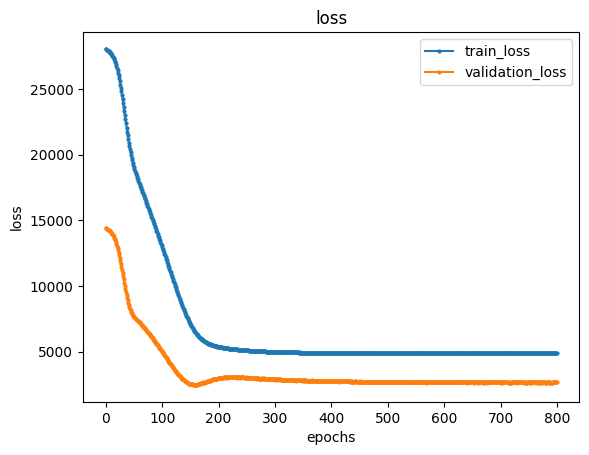

In [86]:
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'], marker = 'o' , ms = 2, label = 'train_loss')
plt.plot(hist.history['val_loss'], marker = 'o' , ms = 2, label = 'validation_loss')
plt.legend()

preds = model.predict(X_val, batch_size=128)
rmse = np.sqrt(mean_squared_error(preds, Y_val))
r2 = r2_score(Y_val, preds)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

### 3. 1번에서 만든 모델을 실제 데이터와 선 그래프로 비교하는 시각화를 진행해 보세요.

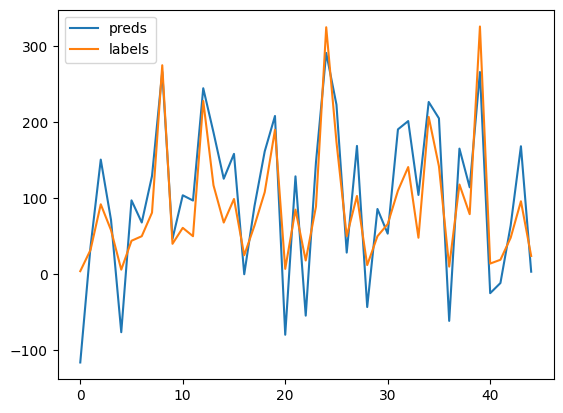

In [87]:
x_axis = [i for i in range(len(preds))]
plt.plot(x_axis,preds,label='preds')
plt.plot(x_axis,Y_val,label='labels')
plt.legend()